# Global Power Plant Database
- Problem Statement:
- Description

- The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

- Key attributes of the database
- The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year`(number): year of plant operation, weighted by unit capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
- Fuel Type Aggregation
- We define the "Fuel Type" attribute of our database based on common fuel categories. 

- Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [2]:
# reading the dataset
df=pd.read_csv(r'C:\Users\tusha\Downloads\power_plant.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                    geolocation_source  wepp_id year_of_capacity_data  \
0    ...  National Renewable Energy Laboratory      NaN                   NaN   
1    ...                                   WRI      NaN                   NaN   
2    ...                                   WRI      NaN                   NaN   
3    ...                                   WRI      NaN                2018.0   
4    ...                                   WRI      NaN                2018.0   
..   ...                                   ...      ...                   ...   
903  ...                                   WRI      NaN                2018.0   
904  ...                        Industry About      NaN                   NaN   
905  ...                                   WRI      NaN                   NaN   
906  ...                                   WRI      NaN                   NaN   
907  ...                                   WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            631.777928          617.789264          843.747000   
4           1668.290000         3035.550000         5916.370000   
..                  ...                 ...                 ...   
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             886.004428           663.774500  Central Electricity Authority   
4            6243.000000          5385.579736  C

In [3]:
# to see the first five elements of the dataset
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

### Dependent variable
The dependent variable is 'Fuel_Type' and 'Capacity_MW'.

### Independent variable
Except Fuel_type and Capacity_MW all are independent variable from the census data.

### Categorical columns
- geolocation_source
- commisioning_year
- year_of_capacity_data
- generation_data

### Continuous columns
- latitude
- longitude
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017

In [4]:
# checking shape of the dataset.
df.shape

(908, 25)

In [5]:
# There are 908 rows and 25 columns.

In [6]:
# To check the datatypes of the columns 
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
# converting the commissioning year which is float into object.
df['commissioning_year']=df['commissioning_year'].astype(object)
df['year_of_capacity_data']=df['year_of_capacity_data'].astype(object)

In [8]:
# converting string into float
df['year_of_capacity_data']=df['year_of_capacity_data'].astype(object)

In [9]:
df['commissioning_year']

0      2011.0
1         NaN
2         NaN
3      2004.0
4      2015.0
        ...  
903    2016.0
904       NaN
905       NaN
906       NaN
907       NaN
Name: commissioning_year, Length: 908, dtype: object

In [10]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year           object
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data        object
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [11]:
# Checking the columns name of the dataset.
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [12]:
# To check the missing values present in the dataset.
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

<AxesSubplot:>

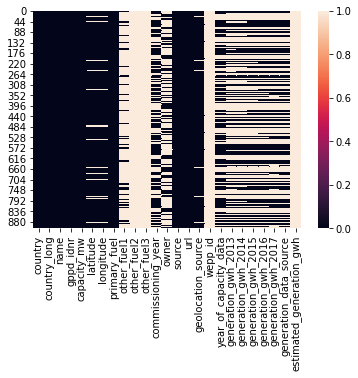

In [13]:
# checking the missing values from the heatmap
sns.heatmap(df.isnull())

In [14]:
# other_fuel2 and other_fuel3 has completely missing values.
# wepp_id also has all the missing values.
# all the white line indicates that there are missing values in the dataset.

In [15]:
df.describe()

capacity_mw    latitude   longitude  other_fuel3  wepp_id  \
count   908.000000  862.000000  862.000000          0.0      0.0   
mean    321.046378   21.196189   77.447848          NaN      NaN   
std     580.221767    6.248627    4.907260          NaN      NaN   
min       0.000000    8.168900   68.644700          NaN      NaN   
25%      16.837500   16.771575   74.258975          NaN      NaN   
50%      60.000000   21.778300   76.719250          NaN      NaN   
75%     388.125000   25.516375   79.441475          NaN      NaN   
max    4760.000000   34.649000   95.408000          NaN      NaN   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           384.000000           401.000000           425.000000   
mean           2304.059202          2420.393316          2414.072373   
std            3794.767492          4013.558173          4183.203199   
min               0.000000             0.000000             0.000000   
25%             244.458088           223.650436           174.174750   
50%             797.063475           805.760000           701.027250   
75%            2795.021500          3034.575000          3080.000000   
max           27586.200000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  estimated_generation_gwh  
count           437.000000           443.000000                       0.0  
mean           2453.936292          2531.754458                       NaN  
std            4152.038216          4187.236364                       NaN  
min               0.000000             0.000000                       NaN  
25%             187.193669           177.643170                       NaN  
50%             716.728350           807.601700                       NaN  
75%            3263.483000          3258.785000                       NaN  
max           30015.000000         35116.000000                       NaN

In [16]:
# the minimum capacity of the powerplant is 0 MW and maximum capacity is 4760 MW.
# Other_fuel3 has all the empty cells
# from 2013-17 minimum output of the powerplant is 0.

In [17]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                    geolocation_source wepp_id year_of_capacity_data  \
0    ...  National Renewable Energy Laboratory     NaN                   NaN   
1    ...                                   WRI     NaN                   NaN   
2    ...                                   WRI     NaN                   NaN   
3    ...                                   WRI     NaN                2018.0   
4    ...                                   WRI     NaN                2018.0   
..   ...                                   ...     ...                   ...   
903  ...                                   WRI     NaN                2018.0   
904  ...                        Industry About     NaN                   NaN   
905  ...                                   WRI     NaN                   NaN   
906  ...                                   WRI     NaN                   NaN   
907  ...                                   WRI     NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            631.777928          617.789264          843.747000   
4           1668.290000         3035.550000         5916.370000   
..                  ...                 ...                 ...   
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016 generation_gwh_2017         generation_data_source  \
0                    NaN                 NaN                            NaN   
1                    NaN                 NaN                            NaN   
2                    NaN                 NaN                            NaN   
3             886.004428          663.774500  Central Electricity Authority   
4            6243.000000         5385.579736  Central Electricity

### Encoding

In [18]:
#converting data from label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
lab_enc=lab_enc.fit_transform(df['primary_fuel'])
df['primary_fuel']=lab_enc

In [19]:
#converting data from label enoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
lab_enc=lab_enc.fit_transform(df['commissioning_year'])
df['commissioning_year']=lab_enc

In [20]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude  primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407             6         NaN         NaN   
1           98.0   24.7663    74.6090             1         NaN         NaN   
2           39.2   21.9038    69.3732             7         NaN         NaN   
3          135.0   23.8712    91.3602             2         NaN         NaN   
4         1800.0   21.9603    82.4091             1         Oil         NaN   
..           ...       ...        ...           ...         ...         ...   
903       1600.0   16.2949    77.3568             1         Oil         NaN   
904          3.0   12.8932    78.1654             6         NaN         NaN   
905         25.5   15.2758    75.5811             7         NaN         NaN   
906         80.0   24.3500    73.7477             1         NaN         NaN   
907         16.5    9.9344    77.4768             7         NaN         NaN   

     ...                    geolocation_source  wepp_id year_of_capacity_data  \
0    ...  National Renewable Energy Laboratory      NaN                   NaN   
1    ...                                   WRI      NaN                   NaN   
2    ...                                   WRI      NaN                   NaN   
3    ...                                   WRI      NaN                2018.0   
4    ...                                   WRI      NaN                2018.0   
..   ...                                   ...      ...                   ...   
903  ...                                   WRI      NaN                2018.0   
904  ...                        Industry About      NaN                   NaN   
905  ...                                   WRI      NaN                   NaN   
906  ...                                   WRI      NaN                   NaN   
907  ...                                   WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            631.777928          617.789264          843.747000   
4           1668.290000         3035.550000         5916.370000   
..                  ...                 ...                 ...   
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016 generation_gwh_2017         generation_data_source  \
0                    NaN                 NaN                            NaN   
1                    NaN                 NaN                            NaN   
2                    NaN                 NaN                            NaN   
3             886.004428          663.774500  Central Electricity Authority   
4            6243.000000         5385.579

## Filling the missing values

In [21]:
#we can use mode values to fill the NaN values of the categorical columns
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [22]:
# we can use mean values to fill the NaN values of the continous column
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [23]:
# now missing values have been either removed or filled with mean and median.

In [24]:
# calculate how old the power plant is 
df['Years_old'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

<AxesSubplot:>

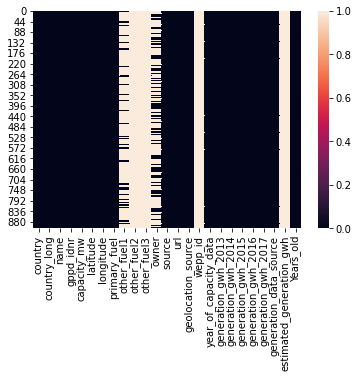

In [25]:
# checking the missing values from the heatmap
sns.heatmap(df.isnull())

In [26]:
# some nan values have been filled using mean and mode method.

## Exploratory Data Analysis

<AxesSubplot:>

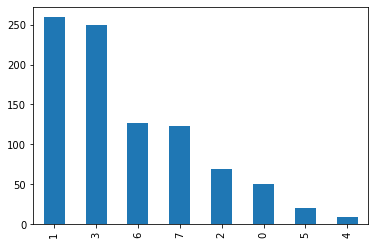

In [27]:
df['primary_fuel'].value_counts().plot.bar()

In [28]:
# It can be inferred from the plot that coal is the most common fuel then hydro then solar.
# Nuclear is the least common fuel.

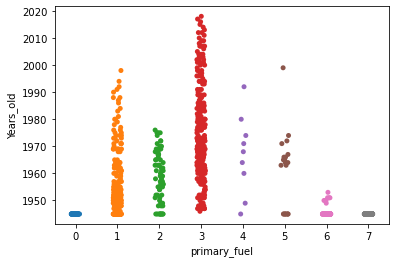

In [29]:
sns.stripplot(x='primary_fuel',y='Years_old',data=df)
plt.show()

In [30]:
# hydro power is more than 80 years old
# coal power plant is more than 50 years old.
# solar is the newest one among all.

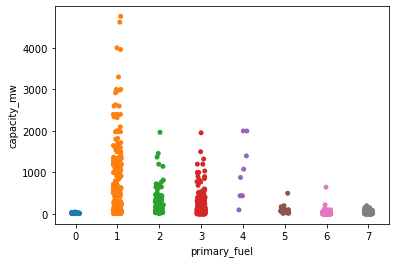

In [31]:
sns.stripplot(x='primary_fuel',y='capacity_mw',data=df)
plt.show()

In [32]:
# from above plot we can see that capacity of coal is highest then hydro then gas then hydoro
# the capacity of nuclear is high but they are low in number.

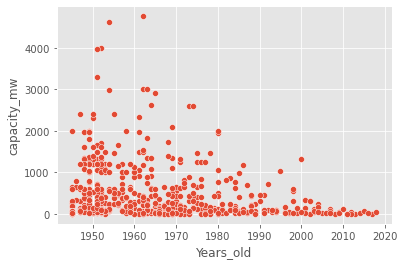

In [33]:
#lets see how plant age affects capacity_mw
plt.style.use('ggplot')
sns.scatterplot(x = "Years_old", y = "capacity_mw", data = df)
plt.show()

In [34]:
# the power generating capacity increased year by year as the demand for power increases.

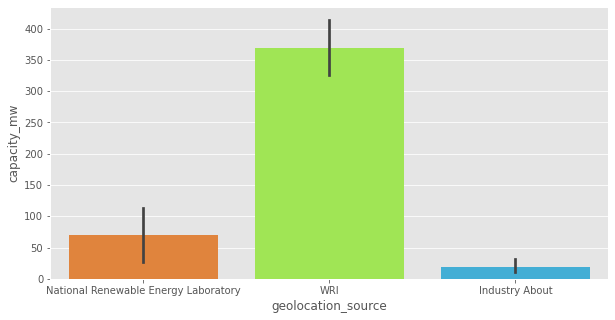

In [35]:
#Lets have a look on relation between source and capacity_mw
plt.figure(figsize = (10,5))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df,palette='turbo_r')
plt.show()

In [36]:
# WRI is the maximum in number according to geolocation.

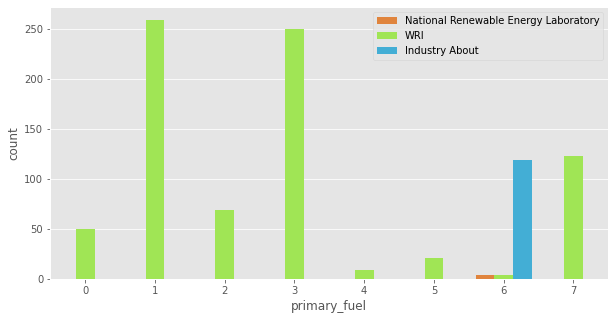

In [37]:
#lets see how geolocation_source related with primary fuel
plt.figure(figsize = (10,5))
sns.countplot(x = "primary_fuel", hue = "geolocation_source", data = df,palette='turbo_r')
plt.legend()
plt.legend(loc = 'upper right')
plt.show()

In [38]:
# coal wind gas hydro biomass oil nuclear are of WRI category
# solar is of national renewable category

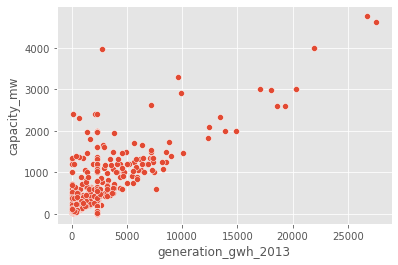

In [39]:
# plot between generation_gwh_2013 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2013', y = 'capacity_mw', data = df)
plt.show()

In [40]:
# power generation growth is more than 5000, capacity_mw is also above 1000MW.

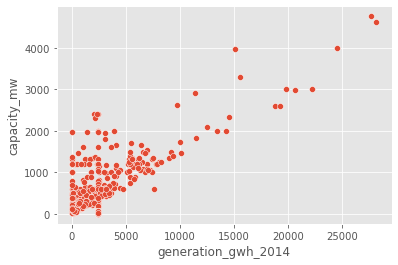

In [41]:
# plot between generation_gwh_2014 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2014', y = 'capacity_mw', data = df)
plt.show()

In [42]:
# generation_gwh_2014 is linearly related to capacity_mw and maximum generation growth is below 30000.

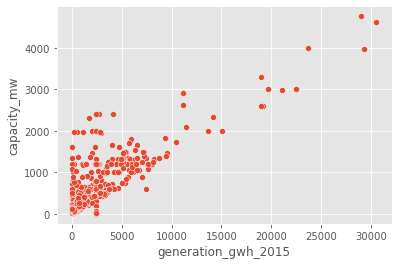

In [43]:
# plot between generation_gwh_2015 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2015', y = 'capacity_mw', data = df)
plt.show()

In [44]:
# generation_gwh_2015 is linearly related to capacity_mw, and maximum generation growth is slightly more than 30000

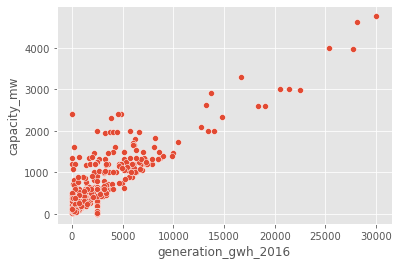

In [45]:
# plot between generation_gwh_2016 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2016', y = 'capacity_mw', data = df)
plt.show()

In [46]:
# generation_gwh_2016 is linearly related to capacity_mw, and maximum generation growth is close to 30000

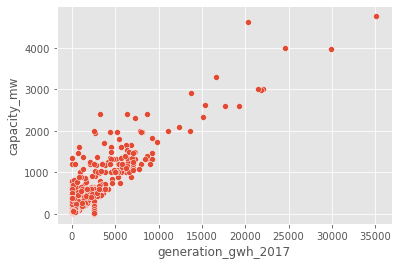

In [47]:
# plot between generation_gwh_2017 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2017', y = 'capacity_mw', data = df)
plt.show()

In [48]:
# maximum capacity is from 0 to 1000

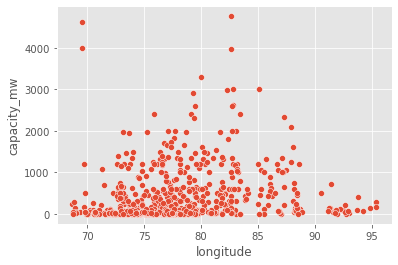

In [49]:
# plot between generation_gwh_2017 vs capacity_mw
sns.scatterplot(x = 'longitude', y = 'capacity_mw', data = df)
plt.show()

In [50]:
# The powerplants are located between 65 to 95 and have capacity between 0 to 1000MW

In [51]:
df['primary_fuel'].value_counts()


1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

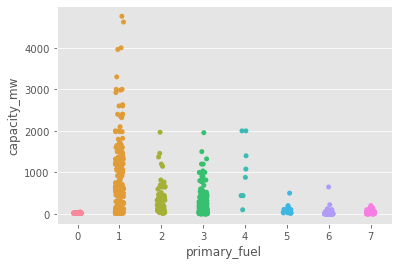

In [52]:
# bar plot for primary_fuel based on capaciy_mw
sns.stripplot(x = 'primary_fuel', y = 'capacity_mw', data = df)
plt.show()

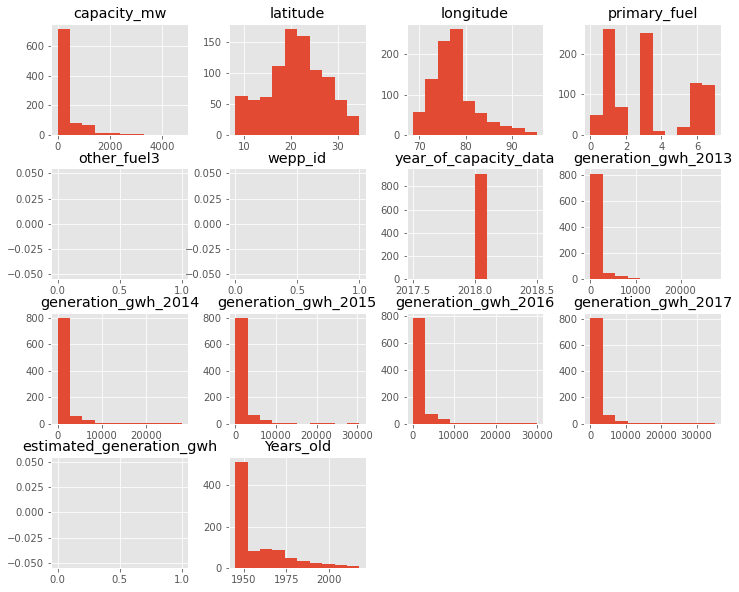

In [53]:
plt.rcParams["figure.figsize"] = 12,10
df.hist();

In [54]:
# from above plot we can see that outliers and skewness are also present in the dataset.

In [55]:
df.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw                  1.000000  0.049790   0.197124     -0.377783   
latitude                     0.049790  1.000000   0.031501     -0.013453   
longitude                    0.197124  0.031501   1.000000     -0.348710   
primary_fuel                -0.377783 -0.013453  -0.348710      1.000000   
other_fuel3                       NaN       NaN        NaN           NaN   
wepp_id                           NaN       NaN        NaN           NaN   
year_of_capacity_data             NaN       NaN        NaN           NaN   
generation_gwh_2013          0.667842  0.036639   0.014021     -0.120512   
generation_gwh_2014          0.705434  0.044085   0.011669     -0.125000   
generation_gwh_2015          0.722081  0.036127   0.019176     -0.125138   
generation_gwh_2016          0.752829  0.030932   0.039758     -0.131358   
generation_gwh_2017          0.767040  0.030655   0.040407     -0.132174   
estimated_generation_gwh          NaN       NaN        NaN           NaN   
Years_old                    0.062725 -0.012254   0.206021     -0.216682   

                          other_fuel3  wepp_id  year_of_capacity_data  \
capacity_mw                       NaN      NaN                    NaN   
latitude                          NaN      NaN                    NaN   
longitude                         NaN      NaN                    NaN   
primary_fuel                      NaN      NaN                    NaN   
other_fuel3                       NaN      NaN                    NaN   
wepp_id                           NaN      NaN                    NaN   
year_of_capacity_data             NaN      NaN                    NaN   
generation_gwh_2013               NaN      NaN                    NaN   
generation_gwh_2014               NaN      NaN                    NaN   
generation_gwh_2015               NaN      NaN                    NaN   
generation_gwh_2016               NaN      NaN                    NaN   
generation_gwh_2017               NaN      NaN                    NaN   
estimated_generation_gwh          NaN      NaN                    NaN   
Years_old                         NaN      NaN                    NaN   

                          generation_gwh_2013  generation_gwh_2014  \
capacity_mw                          0.667842             0.705434   
latitude                             0.036639             0.044085   
longitude                            0.014021             0.011669   
primary_fuel                        -0.120512            -0.125000   
other_fuel3                               NaN                  NaN   
wepp_id                                   NaN                  NaN   
year_of_capacity_data                     NaN                  NaN   
generation_gwh_2013                  1.000000             0.963454   
generation_gwh_2014                  0.963454             1.000000   
generation_gwh_2015                  0.896376             0.953712   
generation_gwh_2016                  0.873542             0.926010   
generation_gwh_2017                  0.830639             0.891872   
estimated_generation_gwh                  NaN                  NaN   
Years_old                           -0.084288            -0.102509   

                          generation_gwh_2015  generation_gwh_2016  \
capacity_mw                          0.722081             0.752829   
latitude                             0.036127             0.030932   
longitude                            0.019176             0.039758   
primary_fuel                        -0.125138            -0.131358   
other_fuel3                               NaN                  NaN   
wepp_id                                   NaN                  NaN   
year_of_capacity_data                     NaN                  NaN   
generation_gwh_2013                  0.896376             0.873542   
generation_gwh_2014                  0.953712             0.926010   
generation_gwh_2015                  1

<AxesSubplot:>

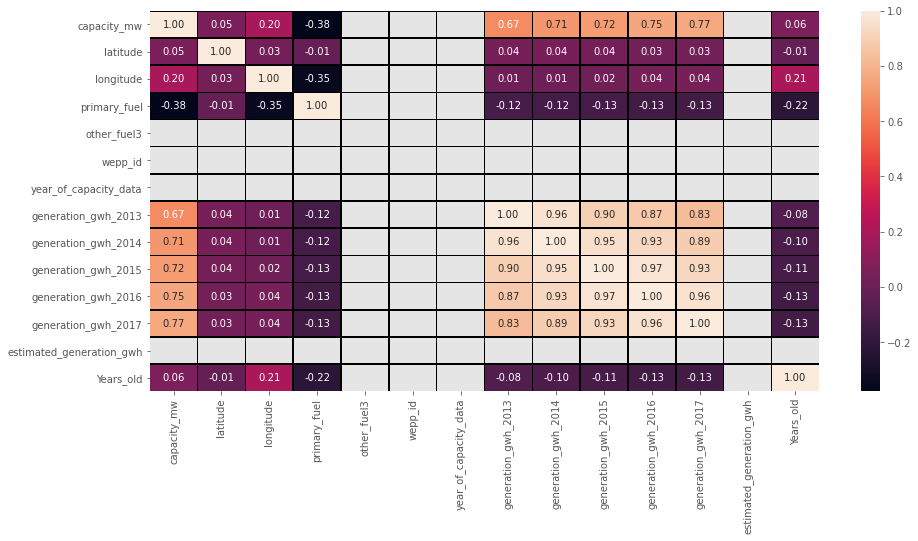

In [56]:
#ploting heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor="black",fmt=".2f")

In [57]:
# it can be seen that there is no correlation between year_of_capacity_data.
# from above heatmap it can be seen that generation year 2013-17 all are highly correlated
# multicollinearity can be seen with some of the columns.

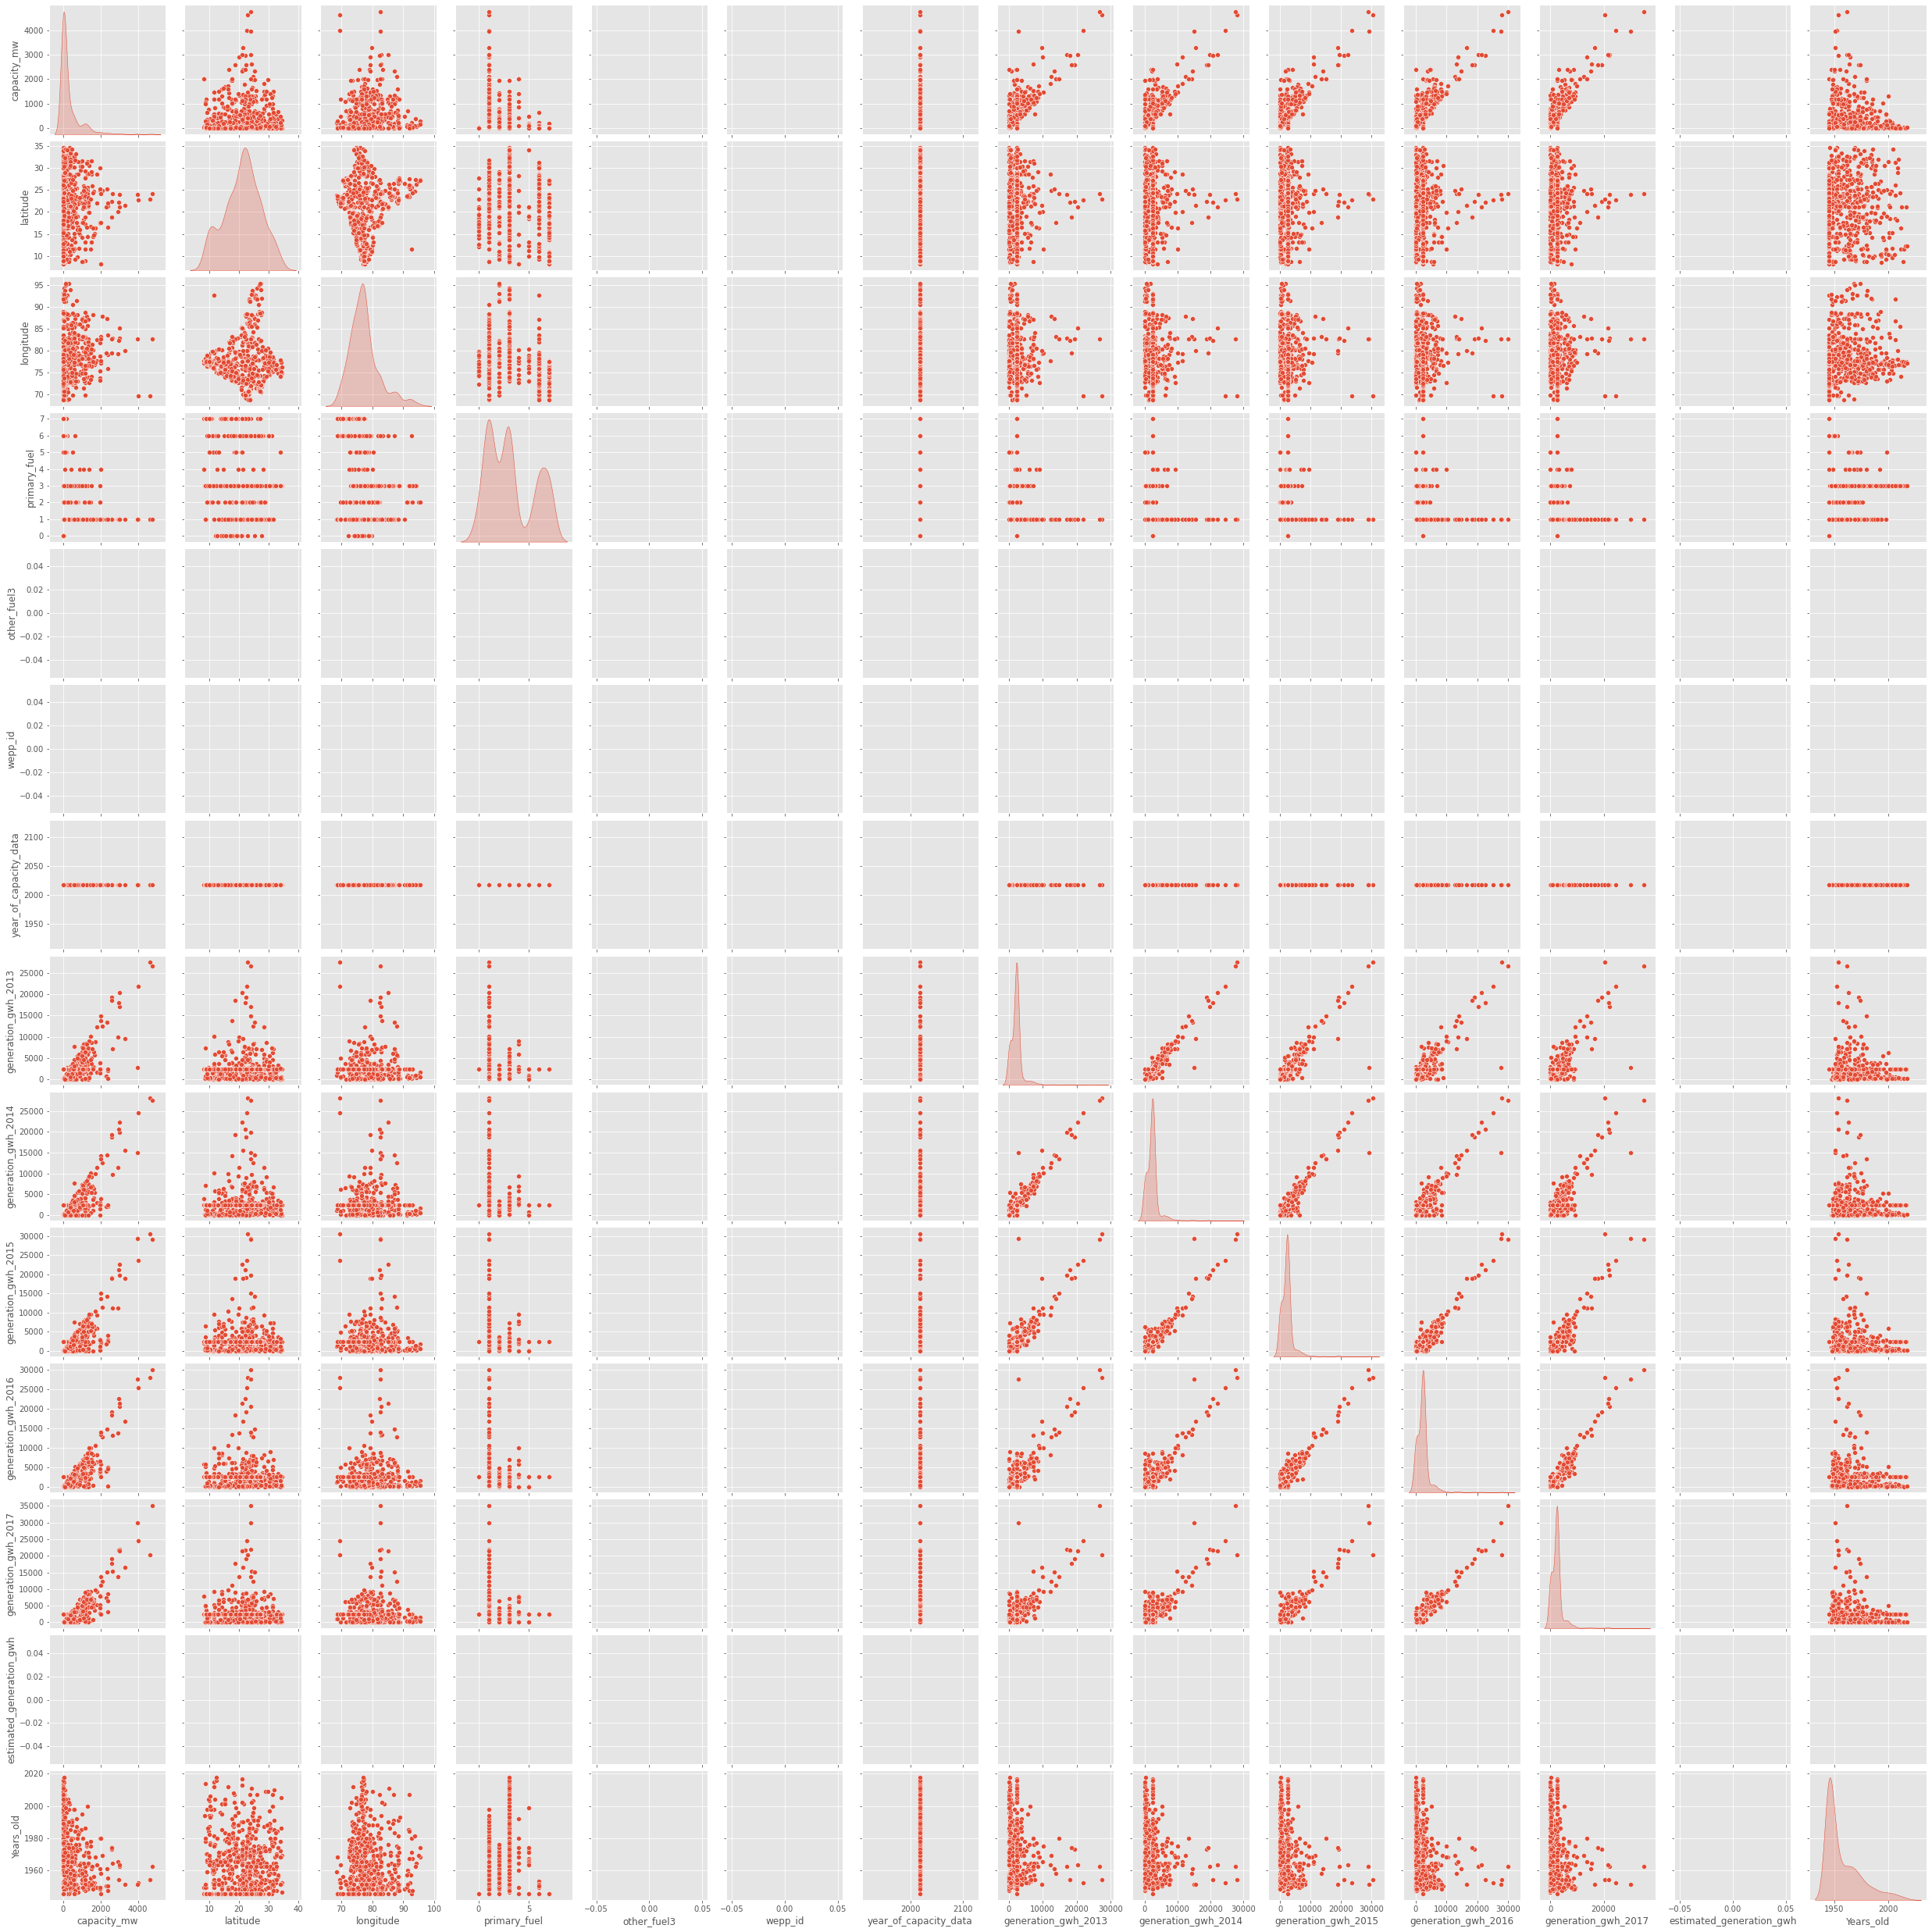

In [58]:
# Plotting a pair plot
sns.pairplot(df,diag_kind='kde')

In [59]:
# dropping some columns which have completly empty columns and the columns which are of no use.
df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','owner','estimated_generation_gwh','country','country_long','name','gppd_idnr','source','url','geolocation_source','generation_data_source'],axis=1,inplace=True)

<AxesSubplot:>

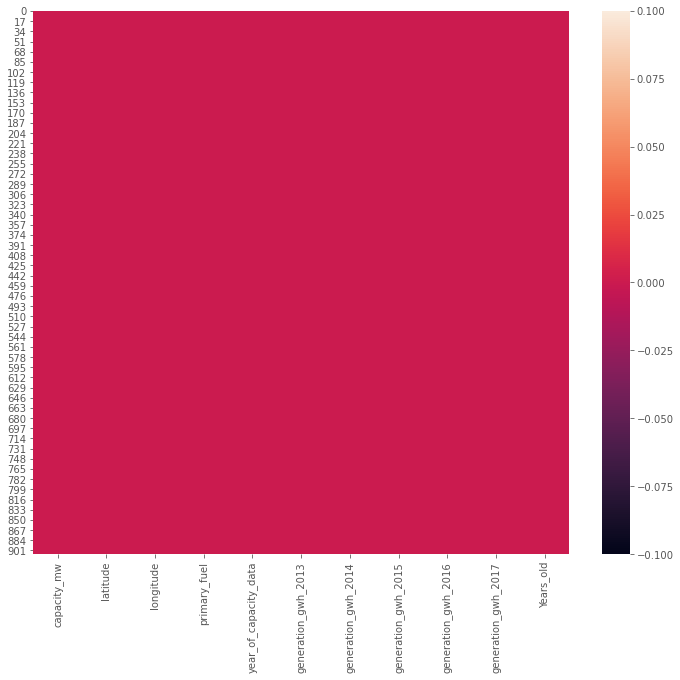

In [60]:
sns.heatmap(df.isnull())

## Outliers detection and removal

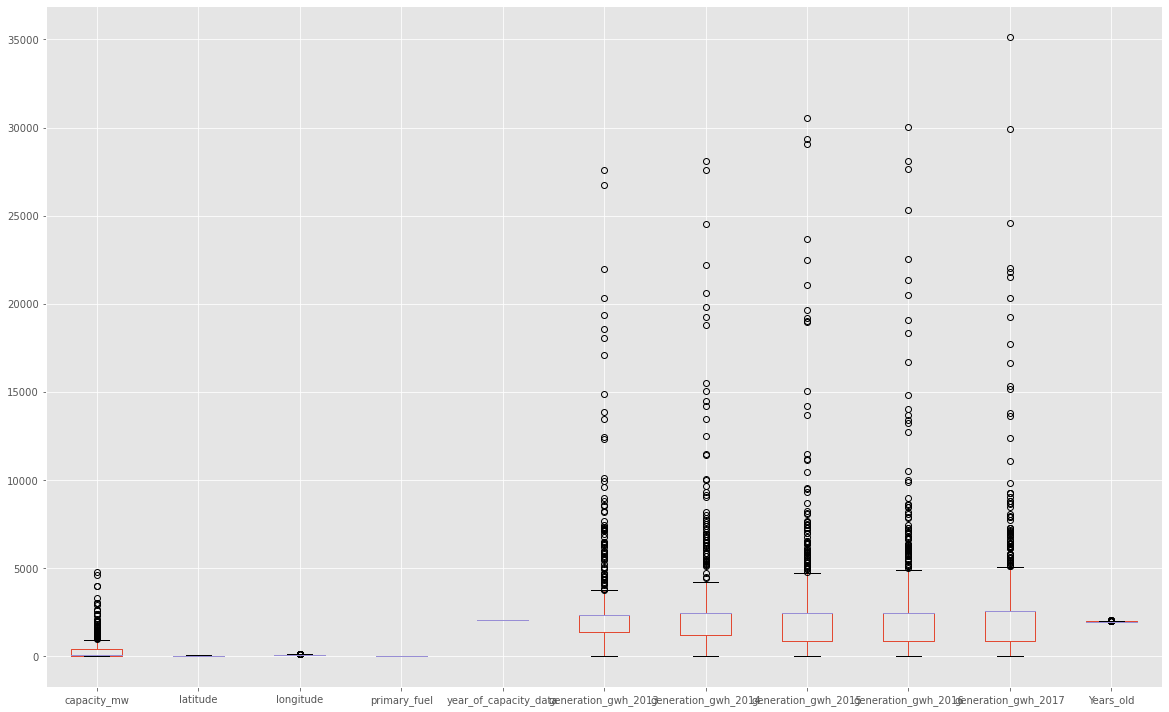

In [61]:
df.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

### Outliers removal

In [62]:
df

capacity_mw  latitude  longitude  primary_fuel  year_of_capacity_data  \
0            2.5   28.1839    73.2407             6                 2018.0   
1           98.0   24.7663    74.6090             1                 2018.0   
2           39.2   21.9038    69.3732             7                 2018.0   
3          135.0   23.8712    91.3602             2                 2018.0   
4         1800.0   21.9603    82.4091             1                 2018.0   
..           ...       ...        ...           ...                    ...   
903       1600.0   16.2949    77.3568             1                 2018.0   
904          3.0   12.8932    78.1654             6                 2018.0   
905         25.5   15.2758    75.5811             7                 2018.0   
906         80.0   24.3500    73.7477             1                 2018.0   
907         16.5    9.9344    77.4768             7                 2018.0   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0            2304.059202          2420.393316          2414.072373   
1            2304.059202          2420.393316          2414.072373   
2            2304.059202          2420.393316          2414.072373   
3             631.777928           617.789264           843.747000   
4            1668.290000          3035.550000          5916.370000   
..                   ...                  ...                  ...   
903          2304.059202          2420.393316             0.994875   
904          2304.059202          2420.393316          2414.072373   
905          2304.059202          2420.393316          2414.072373   
906          2304.059202          2420.393316          2414.072373   
907          2304.059202          2420.393316          2414.072373   

     generation_gwh_2016  generation_gwh_2017  Years_old  
0            2453.936292          2531.754458       1953  
1            2453.936292          2531.754458       1945  
2            2453.936292          2531.754458       1945  
3             886.004428           663.774500       1960  
4            6243.000000          5385.579736       1949  
..                   ...                  ...        ...  
903           233.596650           865.400000       1948  
904          2453.936292          2531.754458       1945  
905          2453.936292          2531.754458       1945  
906          2453.936292          2531.754458       1945  
907          2453.936292          2531.754458       1945  

[908 rows x 11 columns]

In [63]:
df1=df.drop(['primary_fuel'],axis=1)
df1

capacity_mw  latitude  longitude  year_of_capacity_data  \
0            2.5   28.1839    73.2407                 2018.0   
1           98.0   24.7663    74.6090                 2018.0   
2           39.2   21.9038    69.3732                 2018.0   
3          135.0   23.8712    91.3602                 2018.0   
4         1800.0   21.9603    82.4091                 2018.0   
..           ...       ...        ...                    ...   
903       1600.0   16.2949    77.3568                 2018.0   
904          3.0   12.8932    78.1654                 2018.0   
905         25.5   15.2758    75.5811                 2018.0   
906         80.0   24.3500    73.7477                 2018.0   
907         16.5    9.9344    77.4768                 2018.0   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0            2304.059202          2420.393316          2414.072373   
1            2304.059202          2420.393316          2414.072373   
2            2304.059202          2420.393316          2414.072373   
3             631.777928           617.789264           843.747000   
4            1668.290000          3035.550000          5916.370000   
..                   ...                  ...                  ...   
903          2304.059202          2420.393316             0.994875   
904          2304.059202          2420.393316          2414.072373   
905          2304.059202          2420.393316          2414.072373   
906          2304.059202          2420.393316          2414.072373   
907          2304.059202          2420.393316          2414.072373   

     generation_gwh_2016  generation_gwh_2017  Years_old  
0            2453.936292          2531.754458       1953  
1            2453.936292          2531.754458       1945  
2            2453.936292          2531.754458       1945  
3             886.004428           663.774500       1960  
4            6243.000000          5385.579736       1949  
..                   ...                  ...        ...  
903           233.596650           865.400000       1948  
904          2453.936292          2531.754458       1945  
905          2453.936292          2531.754458       1945  
906          2453.936292          2531.754458       1945  
907          2453.936292          2531.754458       1945  

[908 rows x 10 columns]

In [64]:
from scipy import stats

In [65]:
#removing outliers using z score
z=np.abs(stats.zscore(df1))
z

array([[5.49310543e-01, 1.14839610e+00, 8.80420380e-01, ...,
        1.58055100e-16, 1.55659091e-16, 2.87082313e-01],
       [3.84627594e-01, 5.86730280e-01, 5.94079309e-01, ...,
        1.58055100e-16, 1.55659091e-16, 7.64610575e-01],
       [4.86024006e-01, 1.16292425e-01, 1.68976343e+00, ...,
        1.58055100e-16, 1.55659091e-16, 7.64610575e-01],
       ...,
       [5.09648681e-01, 9.72986914e-01, 3.90650123e-01, ...,
        1.58055100e-16, 1.55659091e-16, 7.64610575e-01],
       [4.15667312e-01, 5.18313414e-01, 7.74321627e-01, ...,
        1.58055100e-16, 1.55659091e-16, 7.64610575e-01],
       [5.25168540e-01, 1.85081984e+00, 6.05876281e-03, ...,
        1.58055100e-16, 1.55659091e-16, 7.64610575e-01]])

In [66]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [ 15  15  15  15 144 144 144 144 144 144 159 159 180 184 210 210 210 210
 210 210 240 245 309 309 309 309 309 309 324 334 341 343 361 364 365 365
 365 365 365 365 376 389 417 428 479 483 485 494 494 494 494 494 494 495
 495 495 495 495 495 500 520 530 533 539 547 575 584 602 622 639 649 649
 649 649 649 649 658 658 658 658 658 658 696 696 696 696 696 707 710 722
 722 722 722 725 725 725 725 725 727 727 727 727 727 727 729 787 787 787
 787 787 787 789 808 809 809 809 809 809 819 848 849 881 881 881 881 881
 881]


In [67]:
#removing outliers some rows
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [68]:
df.head()

capacity_mw  latitude  longitude  primary_fuel  year_of_capacity_data  \
0          2.5   28.1839    73.2407             6                 2018.0   
1         98.0   24.7663    74.6090             1                 2018.0   
2         39.2   21.9038    69.3732             7                 2018.0   
3        135.0   23.8712    91.3602             2                 2018.0   
4       1800.0   21.9603    82.4091             1                 2018.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0          2304.059202          2420.393316          2414.072373   
1          2304.059202          2420.393316          2414.072373   
2          2304.059202          2420.393316          2414.072373   
3           631.777928           617.789264           843.747000   
4          1668.290000          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  Years_old  
0          2453.936292          2531.754458       1953  
1          2453.936292          2531.754458       1945  
2          2453.936292          2531.754458       1945  
3           886.004428           663.774500       1960  
4          6243.000000          5385.579736       1949

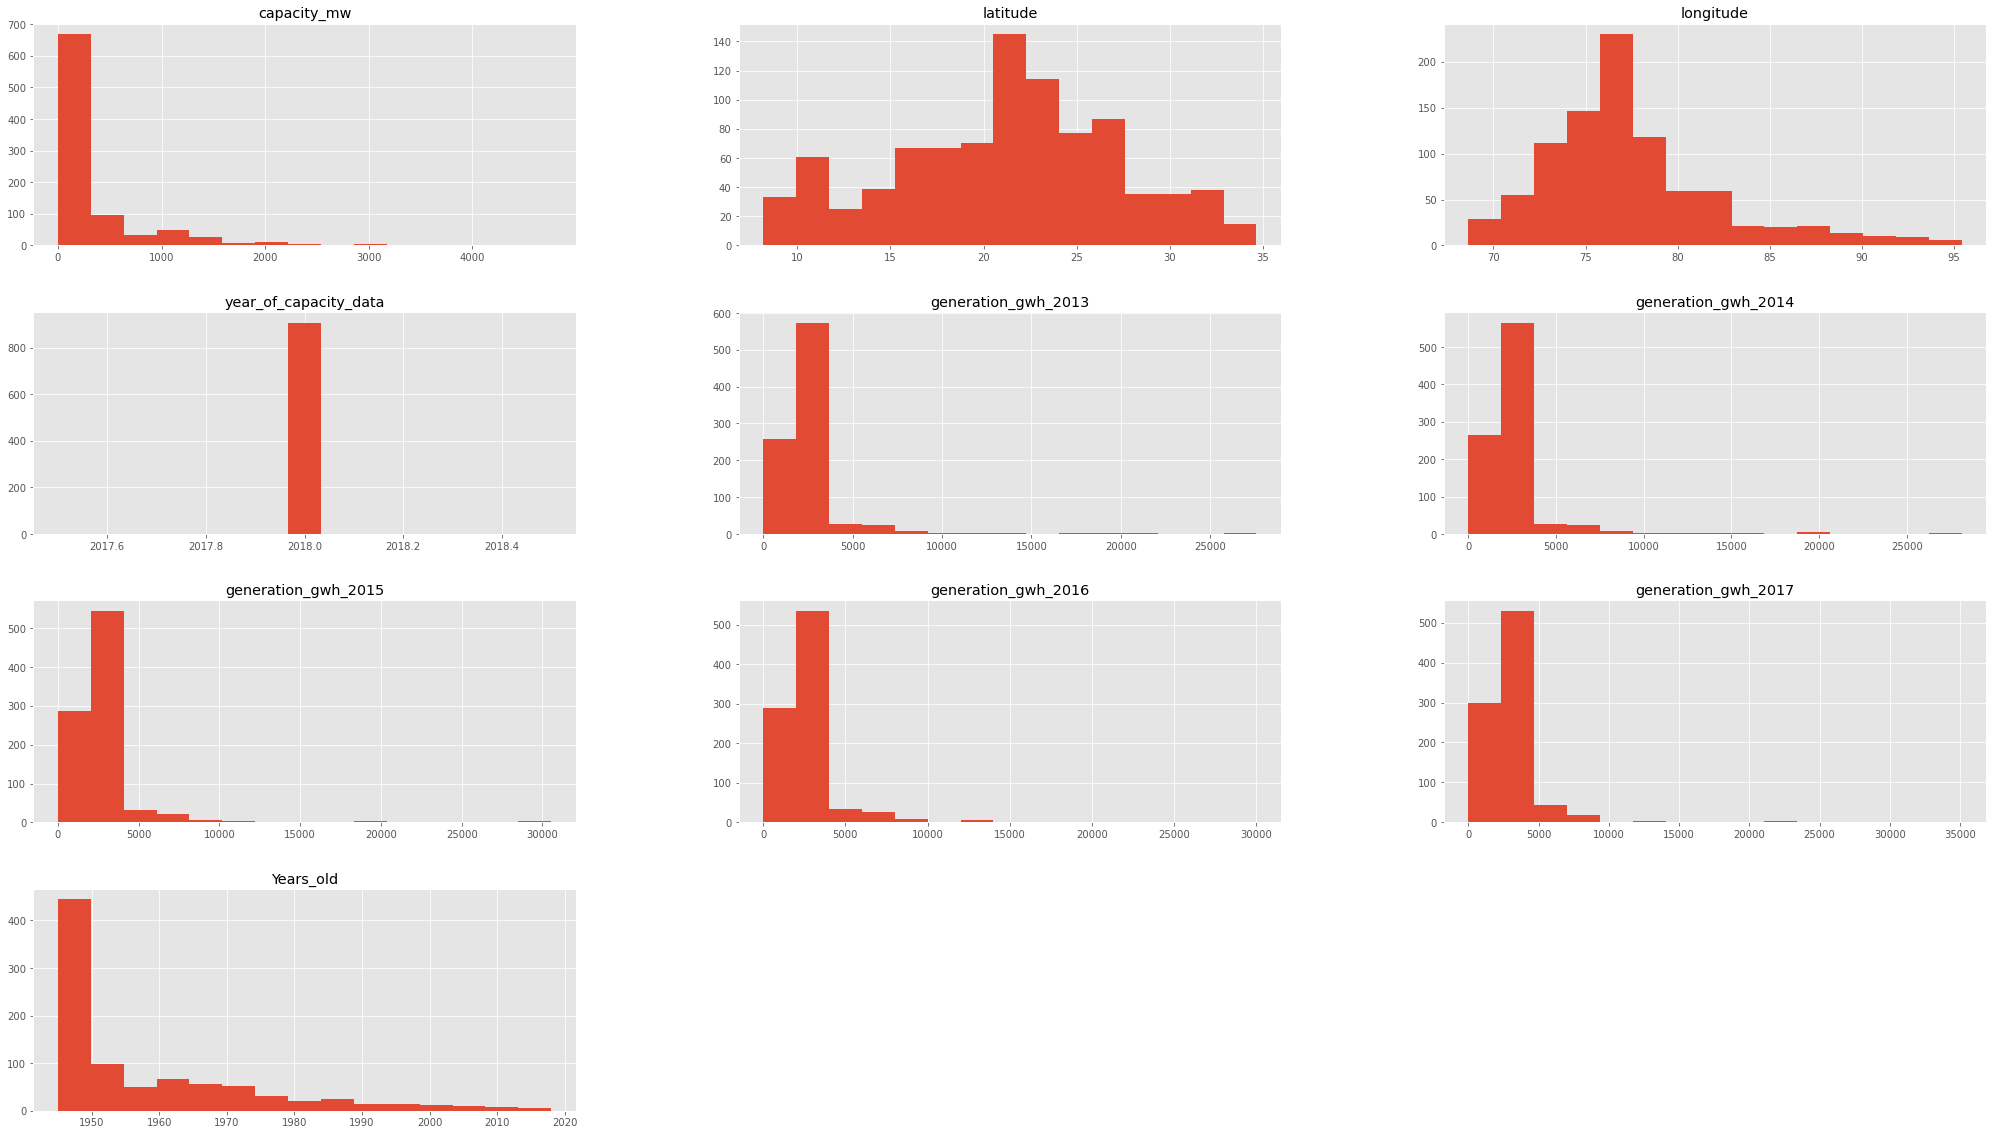

In [69]:
df1.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [70]:
# skewness is still present so it is needed to be removed.

## Splitting feature and Label

In [71]:
X=df.drop(columns=['latitude','longitude','capacity_mw'],axis=1)
y=df['capacity_mw']

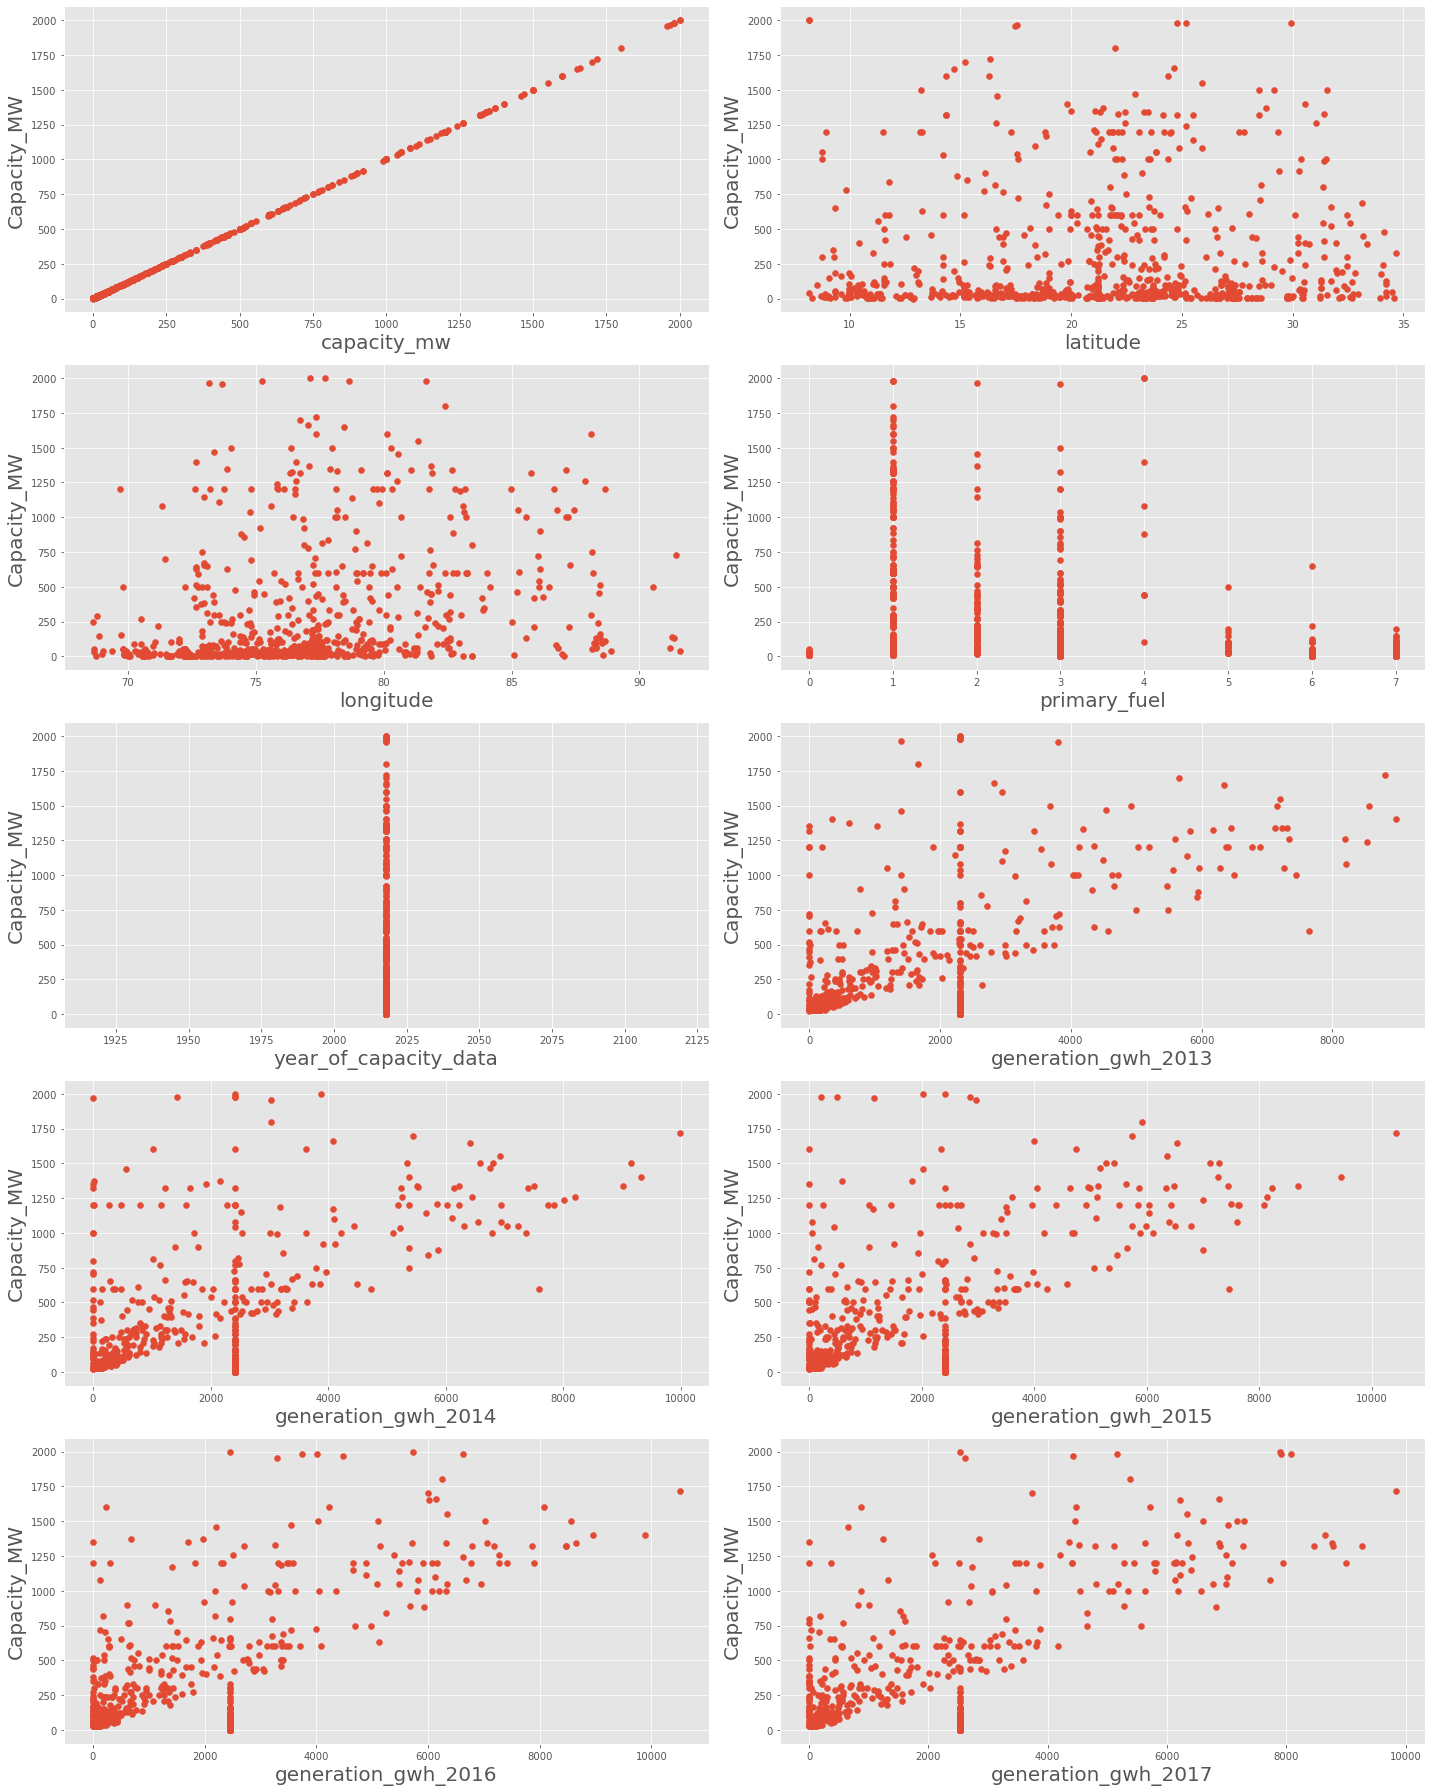

In [72]:
#ploting scatter plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Capacity_MW',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [73]:
# the generated scatterplot shows that longitude and latitude are not correlated with capacity.
# generation with all different years are correlated.

## Checking skewness and removing 

In [74]:
df1.skew()

capacity_mw              3.193257
latitude                -0.147391
longitude                1.129836
year_of_capacity_data    0.000000
generation_gwh_2013      5.241491
generation_gwh_2014      5.041961
generation_gwh_2015      5.367370
generation_gwh_2016      5.071758
generation_gwh_2017      5.111938
Years_old                1.412618
dtype: float64

In [75]:
# any value greater than -0.5  to  +0.5  will be consider under skewness  & any value between -0.5 to  +0.5 is considered as normal value.
# to remove the skewness from the dataset. we use log transformation, sqrt transformation, cbrt transformation or  use boxcox transformation.

# if there is any negative value in the dataset and we use the boxcox transformation then it will show an error.

#    if there is any negative value in the dataset then use  any of the transforamtion other than boxcox transformation.

# there is another thing 
# we can use the          power_transform(df)     to remove the skewness in all the columns  dataset.   

# always use power_transform  function in all the column  
#  note:- if we use power_transform for 1,2,3,4 or 5 columns then we have to write a very long code. 

In [76]:
from sklearn.preprocessing import power_transform
df1=power_transform(X)

df1=pd.DataFrame(df1,columns=X.columns)

In [77]:
df1.skew()

primary_fuel            -0.059022
year_of_capacity_data    0.000000
generation_gwh_2013     -0.174366
generation_gwh_2014     -0.254917
generation_gwh_2015     -0.321855
generation_gwh_2016     -0.318992
generation_gwh_2017     -0.346588
Years_old                0.000000
dtype: float64

In [78]:
# It can be seen that skewness have been removed.

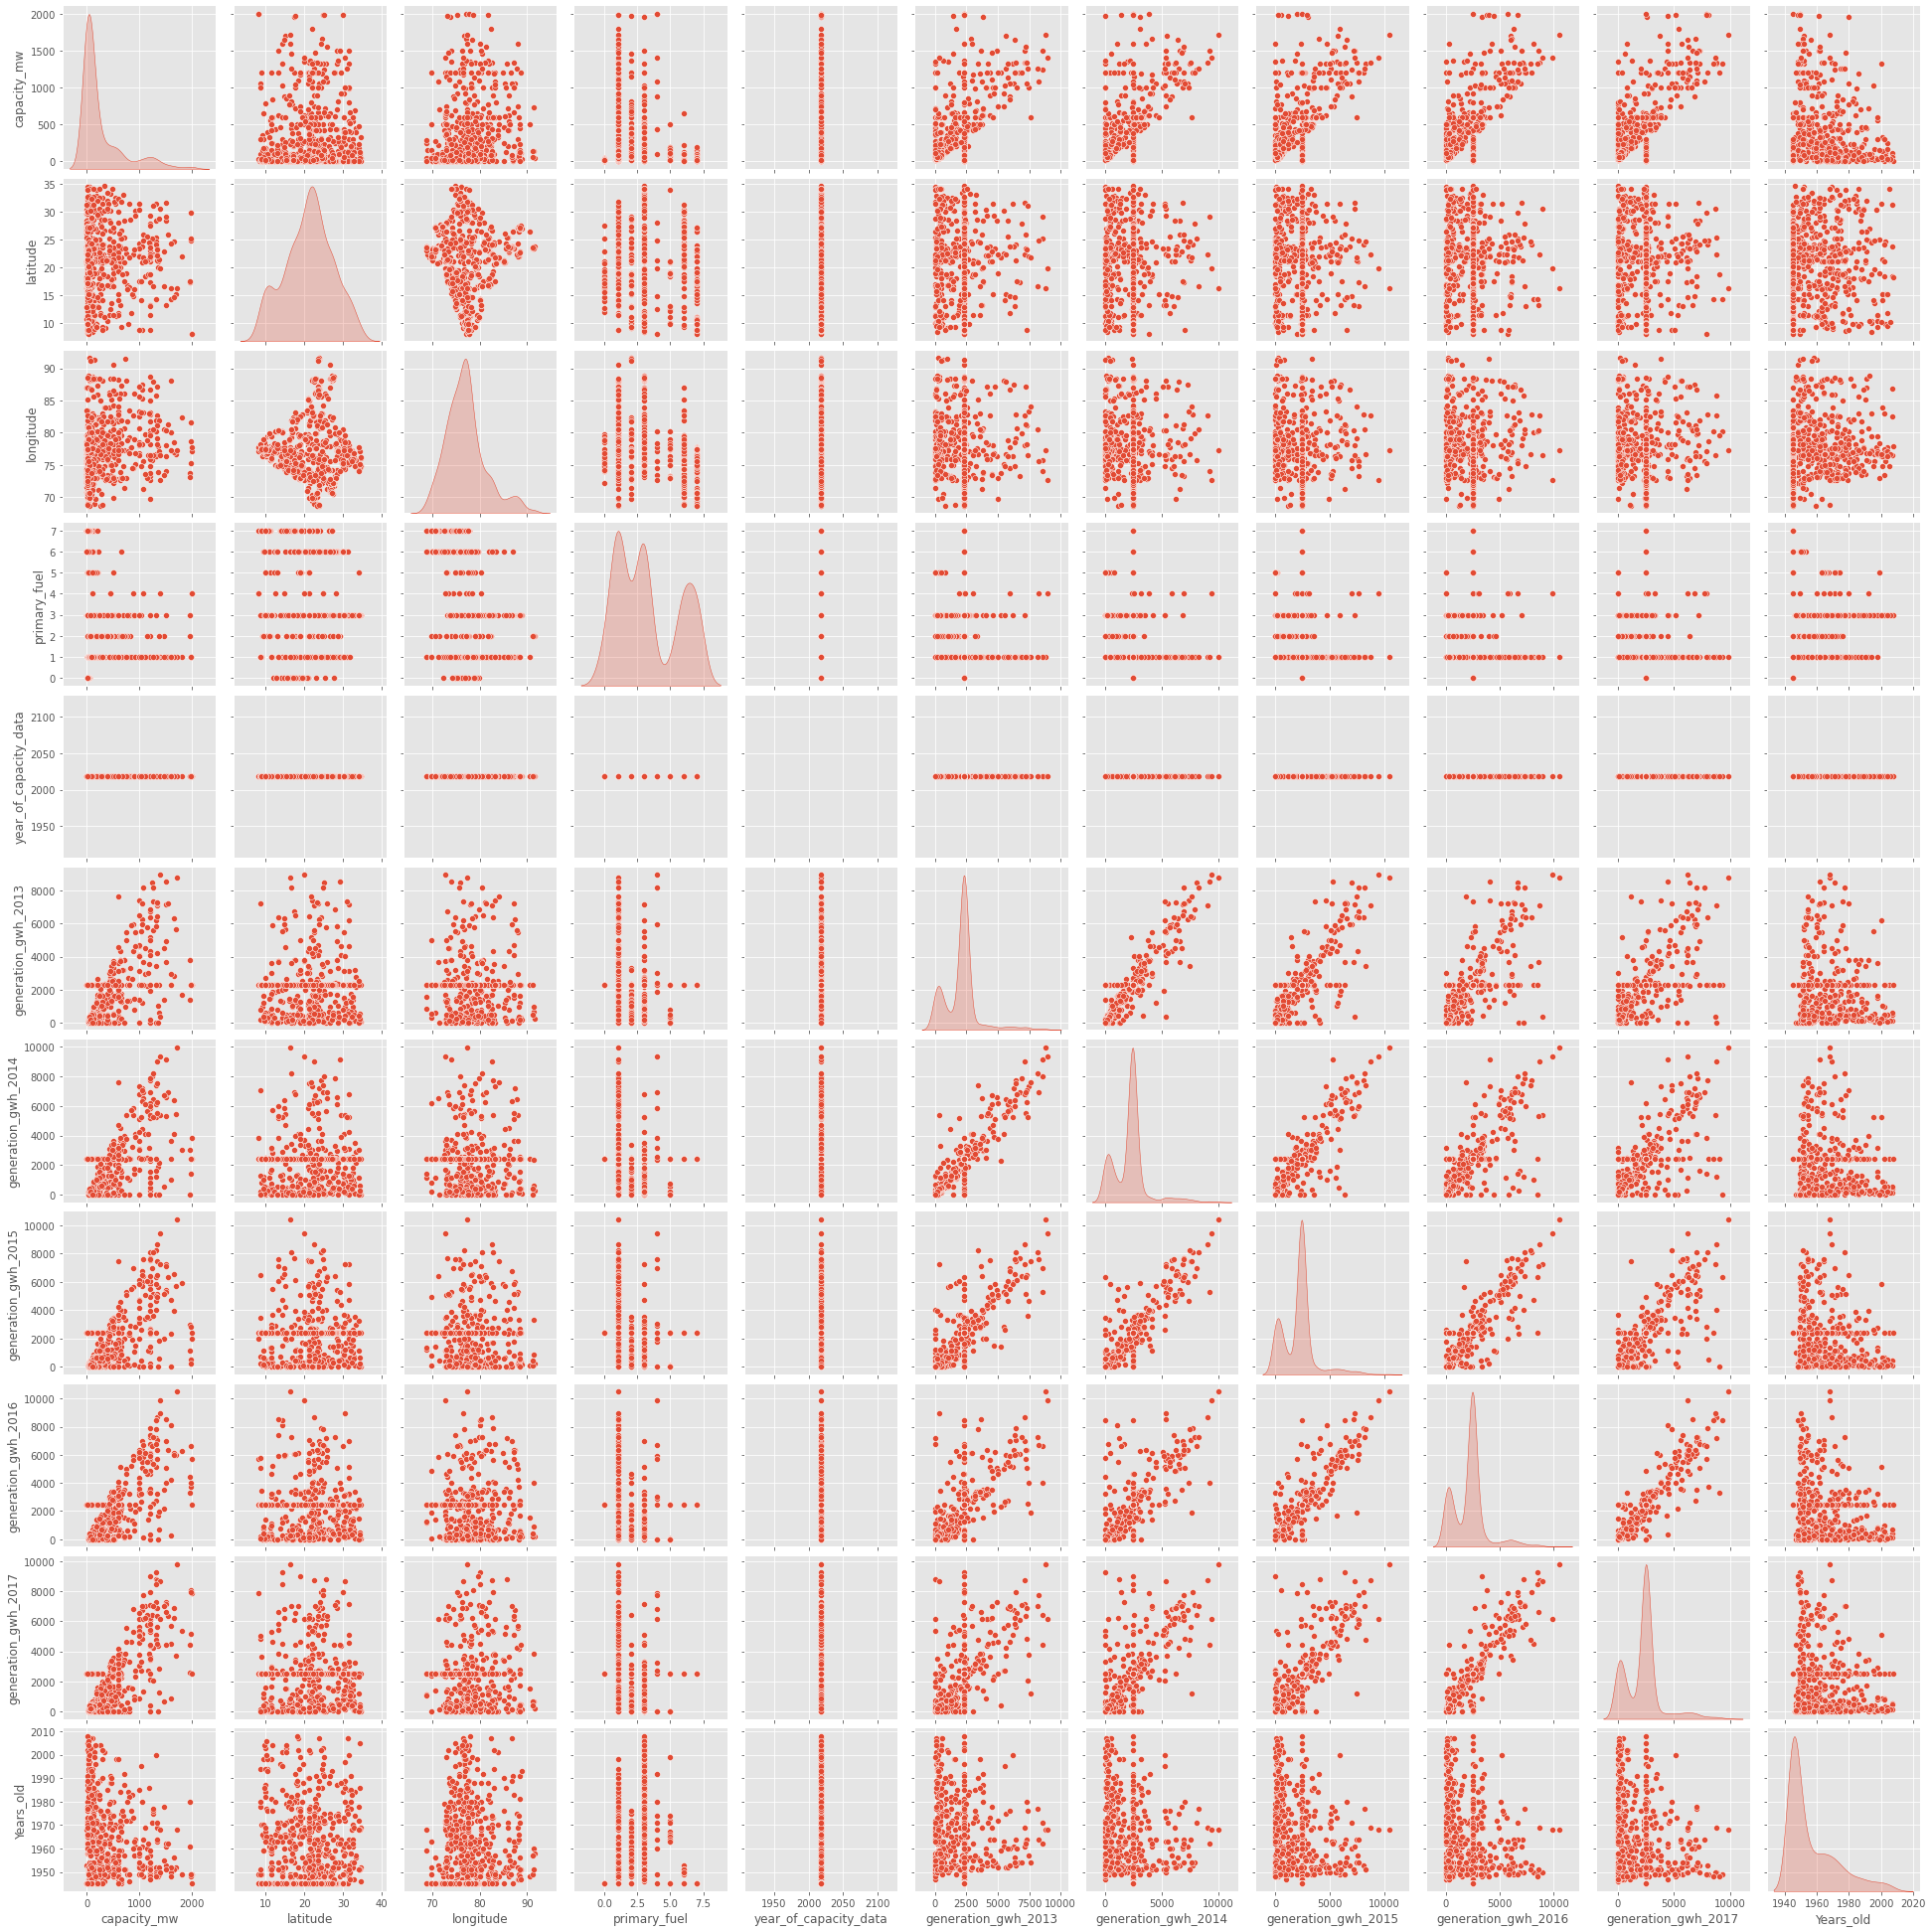

In [79]:
sns.pairplot(df,diag_kind='kde')

In [80]:
# skewness of the data has been removed.

In [81]:
X

primary_fuel  year_of_capacity_data  generation_gwh_2013  \
0               6                 2018.0          2304.059202   
1               1                 2018.0          2304.059202   
2               7                 2018.0          2304.059202   
3               2                 2018.0           631.777928   
4               1                 2018.0          1668.290000   
..            ...                    ...                  ...   
903             1                 2018.0          2304.059202   
904             6                 2018.0          2304.059202   
905             7                 2018.0          2304.059202   
906             1                 2018.0          2304.059202   
907             7                 2018.0          2304.059202   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2420.393316          2414.072373          2453.936292   
1            2420.393316          2414.072373          2453.936292   
2            2420.393316          2414.072373          2453.936292   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
903          2420.393316             0.994875           233.596650   
904          2420.393316          2414.072373          2453.936292   
905          2420.393316          2414.072373          2453.936292   
906          2420.393316          2414.072373          2453.936292   
907          2420.393316          2414.072373          2453.936292   

     generation_gwh_2017  Years_old  
0            2531.754458       1953  
1            2531.754458       1945  
2            2531.754458       1945  
3             663.774500       1960  
4            5385.579736       1949  
..                   ...        ...  
903           865.400000       1948  
904          2531.754458       1945  
905          2531.754458       1945  
906          2531.754458       1945  
907          2531.754458       1945  

[855 rows x 8 columns]

In [82]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 855, dtype: float64

# Model Building

In [83]:
#importing preprocessing power transform
from sklearn.preprocessing import power_transform
X=power_transform(X)
X

array([[ 1.13475253,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       [-1.00259452,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       [ 1.40795398,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       ...,
       [ 1.40795398,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       [-1.00259452,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       [ 1.40795398,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ]])

In [84]:
#importing standerd scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.13475253,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       [-1.00259452,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       [ 1.40795398,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       ...,
       [ 1.40795398,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       [-1.00259452,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ],
       [ 1.40795398,  0.        ,  0.31514857, ...,  0.36949598,
         0.36738381,  0.        ]])

## Train Test Split

In [85]:
#importing train test split
from sklearn.model_selection import train_test_split
#spliting data as x and y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [86]:
#Importing regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

## Linear Regression

In [87]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [88]:
# prediction
y_pred=lr.predict(X_test)

In [89]:
# train score
lr.score(X_train,y_train)

0.24653077855511507

In [90]:
# test score
lr.score(X_test,y_test)

0.31466304638025533

In [91]:
# cross validation
scr=cross_val_score(lr,X,y,cv=5)
print('Cross validation Score: ', scr.mean()*100)

Cross validation Score:  21.86801007926272


### Evaluation metrics

In [92]:
mean_squared_error(y_test,y_pred)

130340.33396573478

In [93]:
mean_absolute_error(y_test,y_pred)

257.96187460566716

In [94]:
np.sqrt(mean_squared_error(y_test,y_pred))

361.0267773527814

## KNeighbors Regressor

In [95]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [96]:
# predict
y_pred=knn.predict(X_test)

In [97]:
# train score
knn.score(X_train,y_train)

0.8368586242524316

In [98]:
# test score
knn.score(X_test,y_test)

0.7400934491541951

In [99]:
# Cross validation score
scr=cross_val_score(knn,X,y,cv=5)
print('Cross validation Score: ',scr.mean()*100)

Cross validation Score:  74.9639500373627


### Evaluation metrics

In [100]:
mean_squared_error(y_test,y_pred)

49430.14740150802

In [101]:
mean_absolute_error(y_test,y_pred)

118.81233696498055

In [102]:
np.sqrt(mean_squared_error(y_test,y_pred))

222.32891715093658

## Decision Tree Regressor

In [103]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [104]:
#predict
y_pred_test=dt.predict(X_test)

In [105]:
#train 
dt.score(X_train,y_train)

0.9825260728284396

In [106]:
#test score
dt.score(X_test,y_test)*100

66.82730235716977

In [107]:
#finding cross val score
scr=cross_val_score(dt,X,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  60.18941332408381


#### Evaluation Metrics

In [108]:
mean_squared_error(y_test,y_pred)

49430.14740150802

In [109]:
mean_absolute_error(y_test,y_pred)

118.81233696498055

In [110]:
np.sqrt(mean_squared_error(y_test,y_pred))

222.32891715093658

## Random Forest Regressor

In [111]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [112]:
#predict 
y_pred=rf.predict(X_test)

In [113]:
#train score
rf.score(X_train,y_train)

0.9506813337270159

In [114]:
#testing score
rf.score(X_test,y_test)*100

80.11470437122887

In [115]:
#cheking cross val score
scr=cross_val_score(rf,X,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  75.92481106200503


In [116]:
mean_squared_error(y_test,y_pred)

37818.71179675905

In [117]:
mean_absolute_error(y_test,y_pred)

104.17855108273919

In [118]:
np.sqrt(mean_squared_error(y_test,y_pred))

194.47033654714298

## Support Vector Machine

In [119]:
svm=SVR()
svm.fit(X_train,y_train)

SVR()

In [120]:
#predict 
y_pred=svm.predict(X_test)

In [121]:
#train score
svm.score(X_train,y_train)

-0.14950545932328518

In [122]:
#cross validation
np.mean(cross_val_score(svm,X,y,cv=5))

-0.15930293913719332

#### Evaluation Metrics

In [123]:
mean_squared_error(y_test,y_pred)

230688.4809222523

In [124]:
mean_absolute_error(y_test,y_pred)

251.73667924363912

In [125]:
np.sqrt(mean_squared_error(y_test,y_pred))

480.30040695615935

## Hyper Parameter Tuning

In [126]:
#Hyper Parameter Tuning using GridSearchCV
params={"n_estimators":[20,40,80],"max_features":["auto", "log2"],"min_samples_split":[2,4,8],"bootstrap":[True, False],'max_depth':[5,10,15],'min_samples_leaf':np.arange(2,10)}

In [127]:
grid = GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)

In [128]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [20, 40, 80]})

In [129]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 20}

In [130]:
rf=RandomForestRegressor(bootstrap=True,max_depth=10,max_features='log2',min_samples_leaf=2,min_samples_split=4,n_estimators=20)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=20)

In [131]:
#prediction
y_pred_rf=rf.predict(X_test)
y_pred

array([ 72.2043329 ,  23.57828052,  50.74023021,  23.57828052,
        22.10000069,  50.69484867,  87.88978667,  79.04470388,
        86.20523265,  22.10000069,  83.33183579,  87.49355711,
        91.85334728,  30.8301404 ,  92.3386014 ,  22.10000069,
        22.10000069,  90.01813314,  23.57828052,  87.49355711,
        63.11242209,  23.57828052,  63.11242209,  50.69484867,
       106.74667598,  63.11242209, 106.4178697 , 100.55087262,
        91.28852784, 105.72905206, 115.03299639,  57.87791109,
        22.46111584, 112.99669221,  23.57828052,  50.69484867,
       101.03317829, 100.50240333,  56.90009691,  87.88978667,
        54.86368747,  29.95604204,  63.11242209,  63.11242209,
        22.10000069, 112.15899672,  23.57828052,  81.15511861,
        22.10000069,  23.57828052,  98.8971305 ,  63.11242209,
        92.94419341,  50.69484867,  23.57828052, 113.06919786,
        81.77264086,  33.18814614,  50.69484867, 106.53791967,
        95.91392142,  23.57828052, 113.63412039,  69.60

In [132]:
#train score
rf.score(X_train,y_train)

0.8850347617235839

In [133]:
#test score
rf.score(X_test,y_test)

0.7931360291533968

In [134]:
#checking cross val score
scr=cross_val_score(rf,X,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  79.07955714713542


#### Evaluation Metrics

In [135]:
mean_squared_error(y_test,y_pred_rf)

39342.28105345156

In [136]:
mean_absolute_error(y_test,y_pred_rf)

107.14146315927255

In [137]:
np.sqrt(mean_squared_error(y_test,y_pred_rf))

198.34888719993253

* We have more than 89% using Random Forest regressor.

### Saving The Model

In [138]:
import joblib
joblib.dump(rf,'Global Power Plant Capacity MW Prediction.pkl')

['Global Power Plant Capacity MW Prediction.pkl']

<AxesSubplot:>

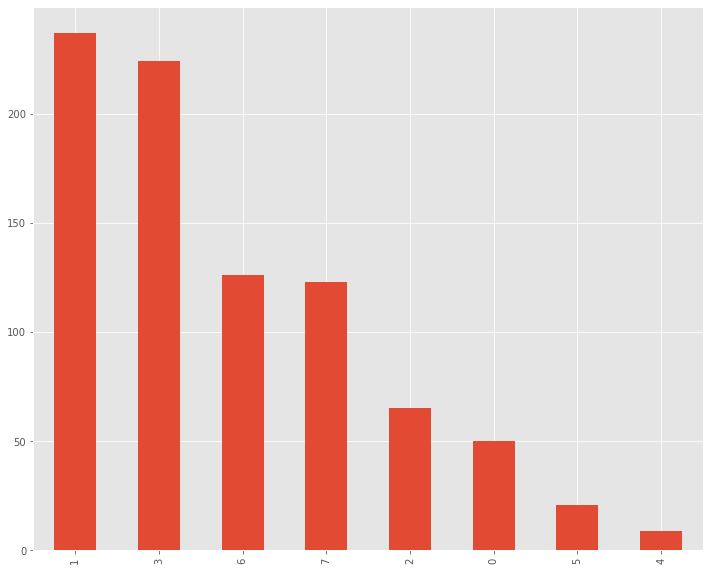

In [139]:
df['primary_fuel'].value_counts().plot.bar()

In [140]:
# It can be inferred from the plot that coal is the most common fuel then hydro then solar.
# Nuclear is the least common fuel.

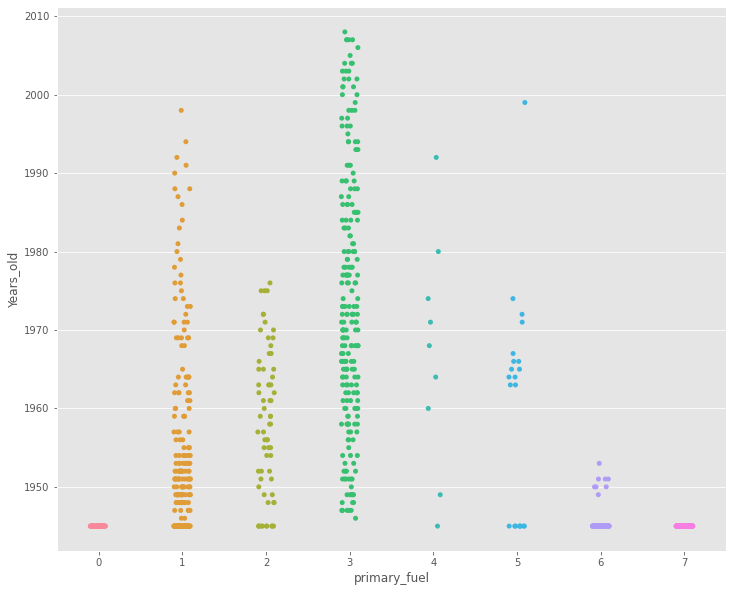

In [141]:
sns.stripplot(x='primary_fuel',y='Years_old',data=df)
plt.show()

In [142]:
# hydro power is more than 80 years old
# coal power plant is more than 50 years old.
# solar is the newest one among all.

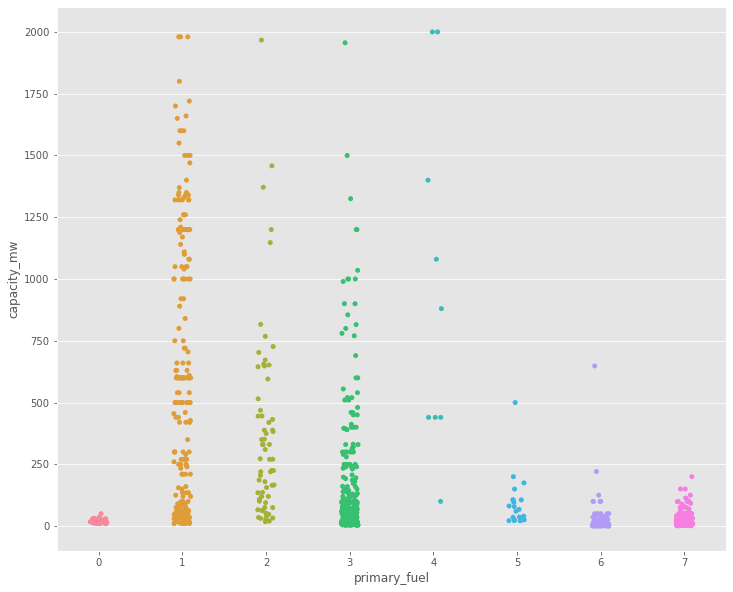

In [143]:
sns.stripplot(x='primary_fuel',y='capacity_mw',data=df)
plt.show()

In [144]:
# from above plot we can see that capacity of coal is highest then hydro then gas then hydoro
# the capacity of nuclear is high but they are low in number.

In [145]:
x=df.drop(columns=['primary_fuel','Years_old'],axis=1)
Y=df['primary_fuel']

In [146]:
x.head()

capacity_mw  latitude  longitude  year_of_capacity_data  \
0          2.5   28.1839    73.2407                 2018.0   
1         98.0   24.7663    74.6090                 2018.0   
2         39.2   21.9038    69.3732                 2018.0   
3        135.0   23.8712    91.3602                 2018.0   
4       1800.0   21.9603    82.4091                 2018.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0          2304.059202          2420.393316          2414.072373   
1          2304.059202          2420.393316          2414.072373   
2          2304.059202          2420.393316          2414.072373   
3           631.777928           617.789264           843.747000   
4          1668.290000          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  
0          2453.936292          2531.754458  
1          2453.936292          2531.754458  
2          2453.936292          2531.754458  
3           886.004428           663.774500  
4          6243.000000          5385.579736

In [147]:
x.shape

(855, 9)

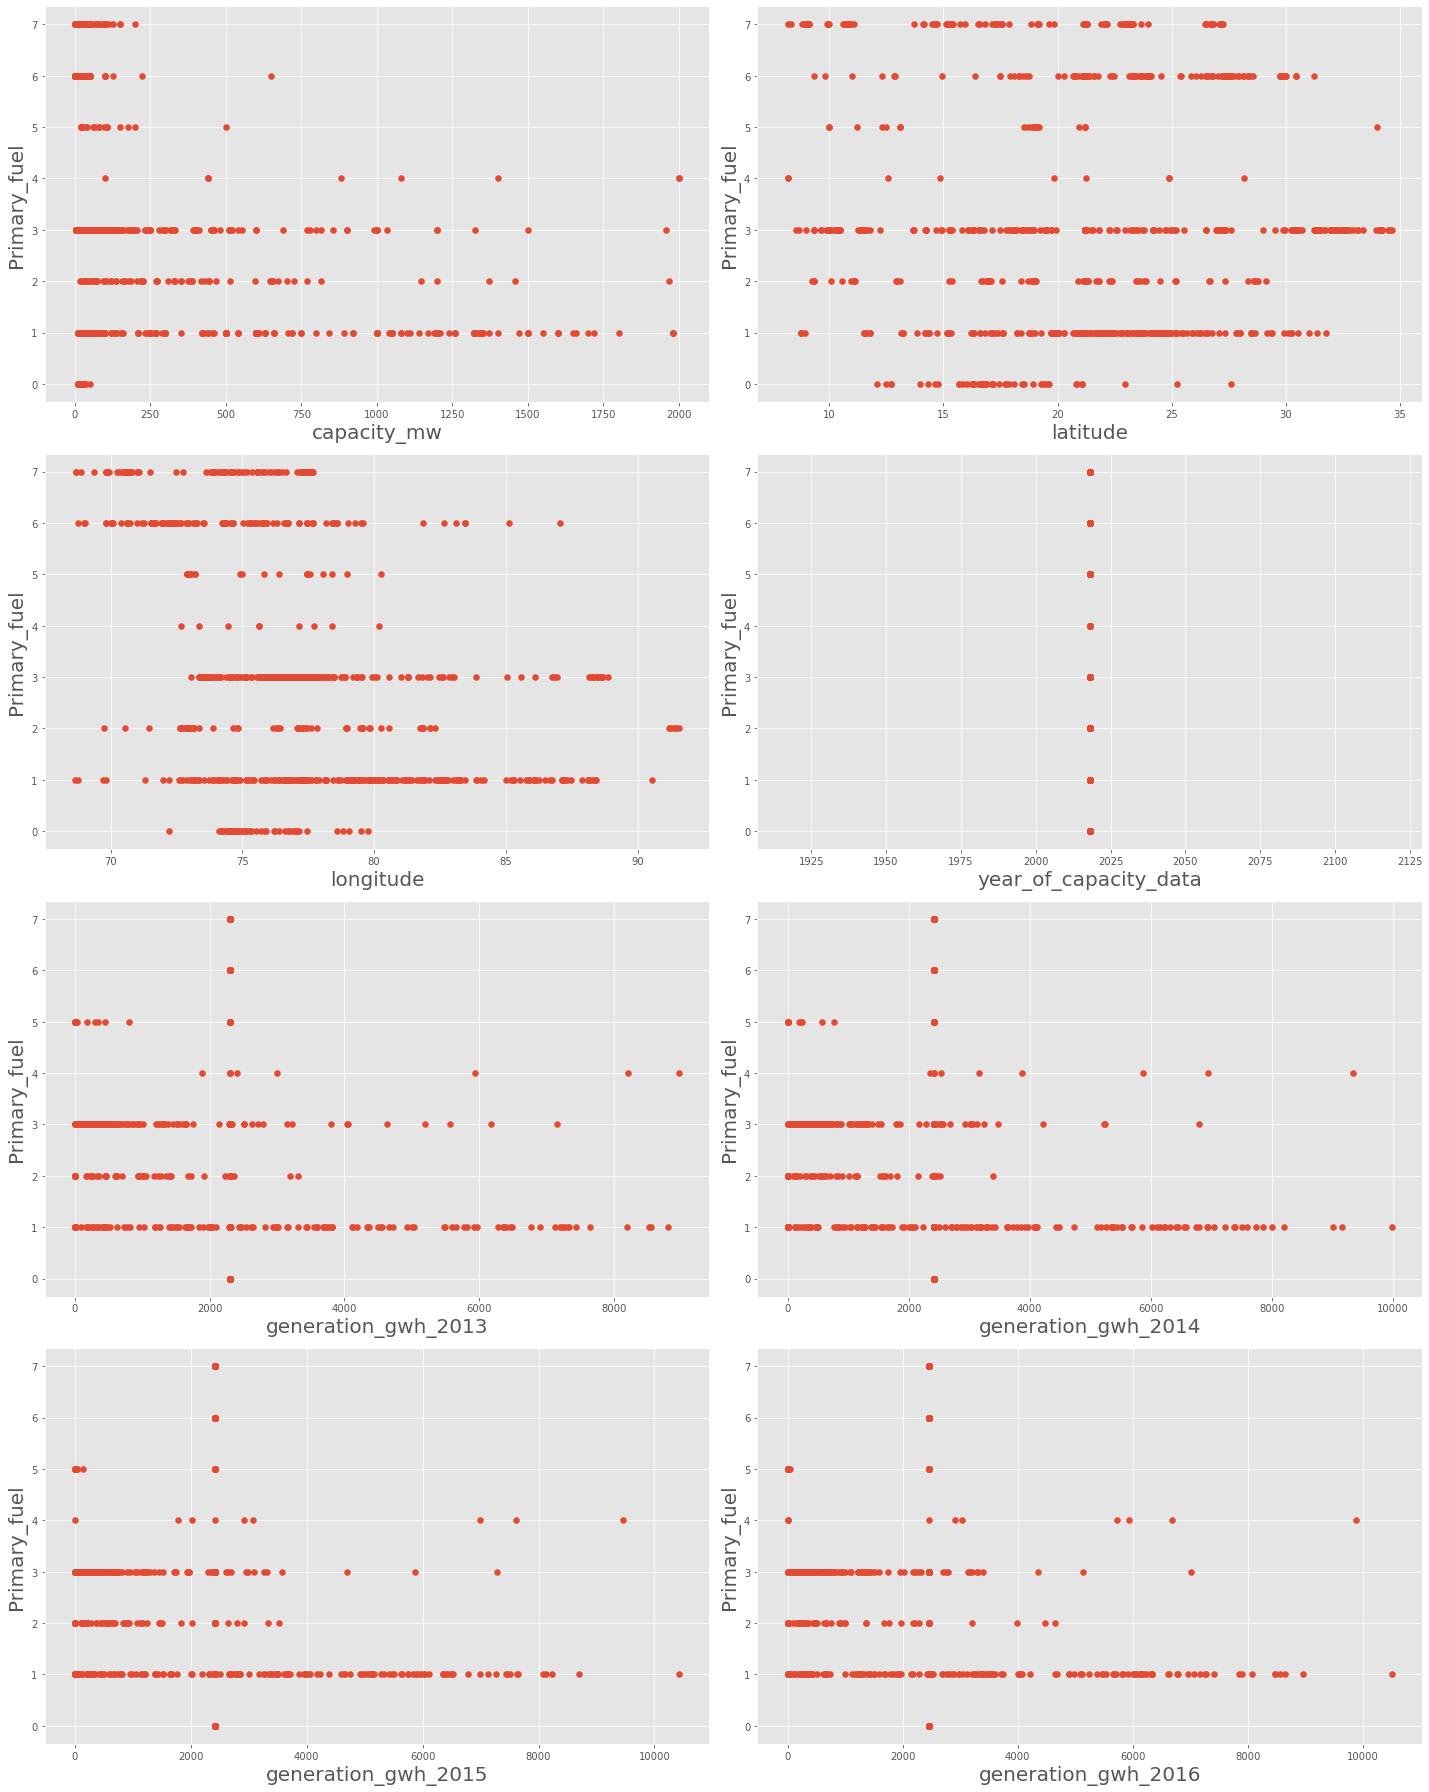

In [148]:
# ploting scatter plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(x[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Primary_fuel',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Correlation between feature and label is clearly visible.

In [149]:
#importing power transform
from sklearn.preprocessing import power_transform

In [150]:
#removing skewness
x=power_transform(x)
x

array([[-1.6789985 ,  1.15810076, -0.93368599, ...,  0.36630606,
         0.36949598,  0.36738381],
       [ 0.2236205 ,  0.59146762, -0.51336375, ...,  0.36630606,
         0.36949598,  0.36738381],
       [-0.27545095,  0.12015491, -2.36453322, ...,  0.36630606,
         0.36949598,  0.36738381],
       ...,
       [-0.50964495, -0.95743039, -0.23765479, ...,  0.36630606,
         0.36949598,  0.36738381],
       [ 0.11336989,  0.52272864, -0.77332407, ...,  0.36630606,
         0.36949598,  0.36738381],
       [-0.74502451, -1.80781777,  0.25113505, ...,  0.36630606,
         0.36949598,  0.36738381]])

In [151]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [152]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.6789985 ,  1.15810076, -0.93368596, ...,  0.36630606,
         0.36949598,  0.36738381],
       [ 0.2236205 ,  0.59146762, -0.51336372, ...,  0.36630606,
         0.36949598,  0.36738381],
       [-0.27545095,  0.12015491, -2.36453319, ...,  0.36630606,
         0.36949598,  0.36738381],
       ...,
       [-0.50964495, -0.95743039, -0.23765476, ...,  0.36630606,
         0.36949598,  0.36738381],
       [ 0.11336989,  0.52272864, -0.77332404, ...,  0.36630606,
         0.36949598,  0.36738381],
       [-0.74502451, -1.80781777,  0.25113508, ...,  0.36630606,
         0.36949598,  0.36738381]])

### Handling class imbalance problem by oversampling 

In [153]:
#importing SMOTE
from imblearn.over_sampling import SMOTE

In [154]:
sm=SMOTE()
x_over,Y_over=sm.fit_resample(x,Y)
Y_over.value_counts()

0    237
1    237
2    237
3    237
4    237
5    237
6    237
7    237
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

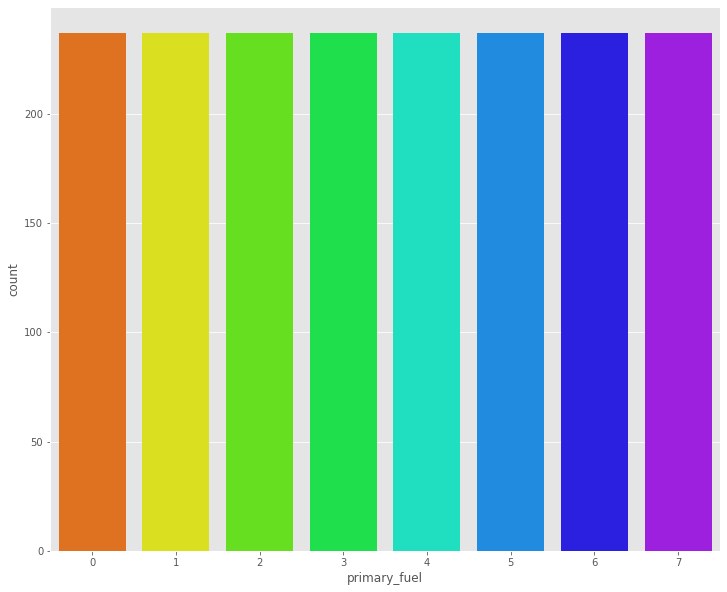

In [155]:
sns.countplot(Y_over,palette='gist_rainbow')

In [156]:
# train test split method
from sklearn.model_selection import train_test_split

In [157]:
#split the dataset
x_train,x_test,Y_train,Y_test=train_test_split(x_over,Y_over,test_size=0.30,random_state=50)

# Model building

In [158]:
#importing requred libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve

## KNeighbors Classifier

In [159]:
import scikitplot as skplt

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        71
           1       0.71      0.49      0.58        72
           2       0.73      0.70      0.71        57
           3       0.81      0.56      0.66        75
           4       0.77      1.00      0.87        72
           5       0.85      0.99      0.91        74
           6       0.80      0.88      0.84        82
           7       0.72      0.59      0.65        66

    accuracy                           0.78       569
   macro avg       0.77      0.77      0.76       569
weighted avg       0.77      0.78      0.76       569



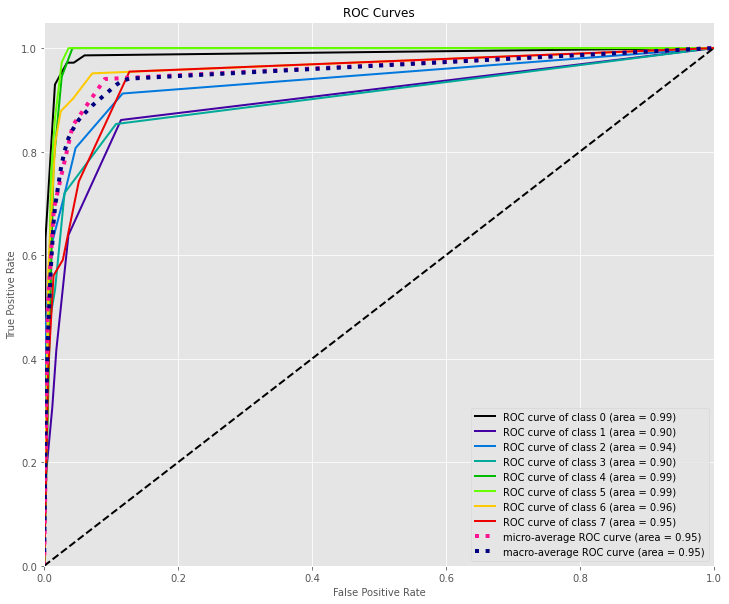

In [160]:
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)

#predict
knn_Y_pred=knn.predict(x_test)

#train score
knn.score(x_train,Y_train)

#test score
knn.score(x_test,Y_test)
accuracy_score(Y_test,knn_Y_pred)

#cross validation score
np.mean(cross_val_score(knn,x_over,Y_over,cv=5))

print(classification_report(Y_test,knn_Y_pred))

confusion_matrix(Y_test,knn_Y_pred)

# Plotting ROC curve

probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(Y_test,probas)
plt.show()

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        71
           1       0.62      0.53      0.57        72
           2       0.76      0.72      0.74        57
           3       0.61      0.64      0.62        75
           4       0.82      0.89      0.85        72
           5       0.87      0.93      0.90        74
           6       0.86      0.82      0.84        82
           7       0.74      0.76      0.75        66

    accuracy                           0.77       569
   macro avg       0.77      0.77      0.77       569
weighted avg       0.77      0.77      0.77       569



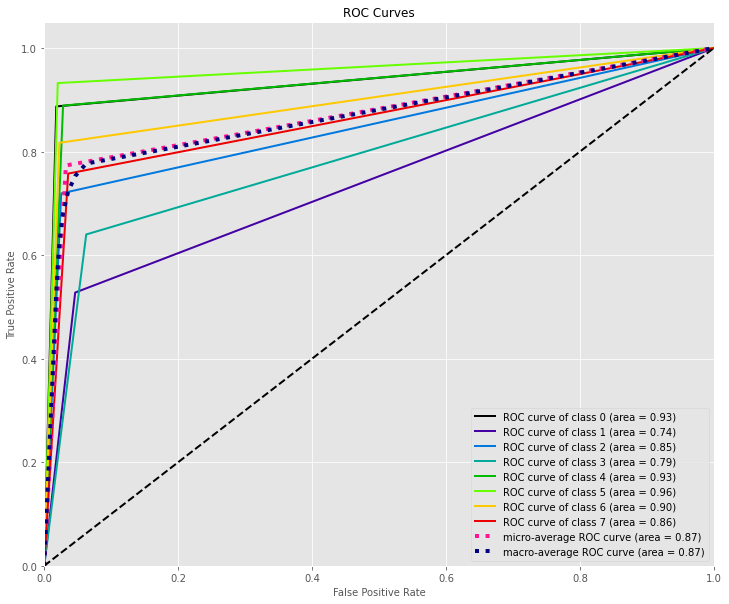

In [161]:
dt=DecisionTreeClassifier()
dt.fit(x_train,Y_train)

#prediction
dt_Y_pred=dt.predict(x_test)

#training score
dt.score(x_train,Y_train)

#testing score
accuracy_score(Y_test,dt_Y_pred)

#Cross validation score
np.mean(cross_val_score(dt,x_over,Y_over,cv=5))

#### Evaluation Metrics

print(classification_report(Y_test,dt_Y_pred))

confusion_matrix(Y_test,dt_Y_pred)

#Decision Tree Random forest
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(Y_test,probas)
plt.show()

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.84      0.99      0.91        71
           1       0.81      0.61      0.70        72
           2       0.73      0.79      0.76        57
           3       0.80      0.68      0.73        75
           4       0.84      0.96      0.90        72
           5       0.88      0.96      0.92        74
           6       0.94      0.91      0.93        82
           7       0.84      0.80      0.82        66

    accuracy                           0.84       569
   macro avg       0.83      0.84      0.83       569
weighted avg       0.84      0.84      0.84       569



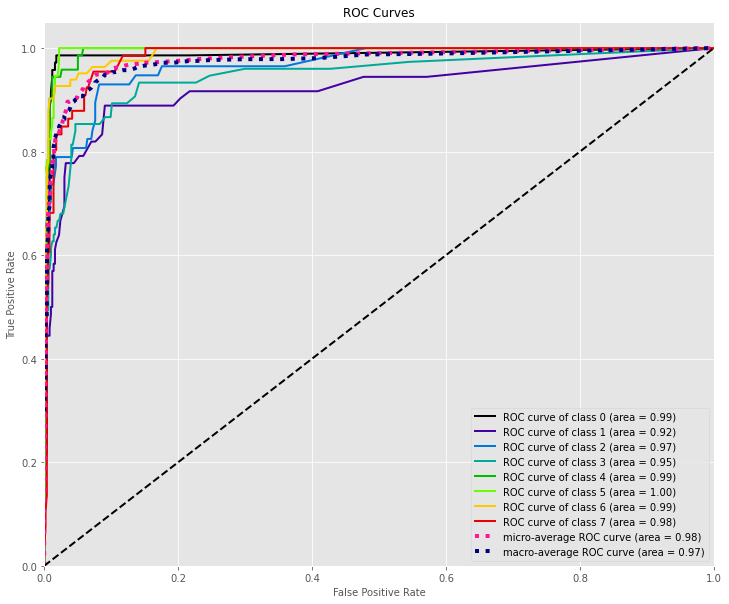

In [162]:
rf=RandomForestClassifier()
rf.fit(x_train,Y_train)

#prediction
rf_Y_pred=rf.predict(x_test)

#traing score
rf.score(x_train,Y_train)

#testing score
rf.score(x_test,Y_test)

accuracy_score(Y_test,rf_Y_pred)

#cross validation score
np.mean(cross_val_score(rf,x_over,Y_over,cv=5))

#### Evaluation Metrics

print(classification_report(Y_test,rf_Y_pred))

confusion_matrix(Y_test,rf_Y_pred)

#Random Forest
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(Y_test,probas)
plt.show()

## Support Vector Classifier

In [163]:
svm=SVC()
svm.fit(x_train,Y_train)

#prediction
svm_Y_pred=svm.predict(x_test)

#training score
svm.score(x_train,Y_train)

#testing score
accuracy_score(Y_test,svm_Y_pred)

#cross validation score
np.mean(cross_val_score(svm,x_over,Y_over,cv=5))

#### Evaluation Metrics

print(classification_report(Y_test,svm_Y_pred))

confusion_matrix(Y_test,svm_Y_pred)

# for this we can't plot roc curve as svm has probability false.

              precision    recall  f1-score   support

           0       0.57      0.96      0.71        71
           1       0.71      0.56      0.63        72
           2       0.60      0.60      0.60        57
           3       0.83      0.47      0.60        75
           4       0.82      0.92      0.87        72
           5       0.72      0.96      0.83        74
           6       0.80      0.73      0.76        82
           7       0.59      0.36      0.45        66

    accuracy                           0.70       569
   macro avg       0.71      0.69      0.68       569
weighted avg       0.71      0.70      0.69       569



array([[68,  0,  0,  0,  0,  0,  2,  1],
       [ 6, 40,  8,  4,  9,  2,  3,  0],
       [ 0,  3, 34,  3,  2, 15,  0,  0],
       [13,  4, 13, 35,  3,  2,  3,  2],
       [ 0,  5,  1,  0, 66,  0,  0,  0],
       [ 1,  1,  1,  0,  0, 71,  0,  0],
       [ 6,  1,  0,  0,  0,  1, 60, 14],
       [26,  2,  0,  0,  0,  7,  7, 24]], dtype=int64)

## Navie Bayes Gaussian Classifier

              precision    recall  f1-score   support

           0       0.56      0.92      0.69        71
           1       0.70      0.29      0.41        72
           2       0.36      0.56      0.44        57
           3       0.57      0.16      0.25        75
           4       0.69      0.72      0.71        72
           5       0.62      0.43      0.51        74
           6       0.69      0.84      0.76        82
           7       0.37      0.47      0.41        66

    accuracy                           0.55       569
   macro avg       0.57      0.55      0.52       569
weighted avg       0.58      0.55      0.53       569



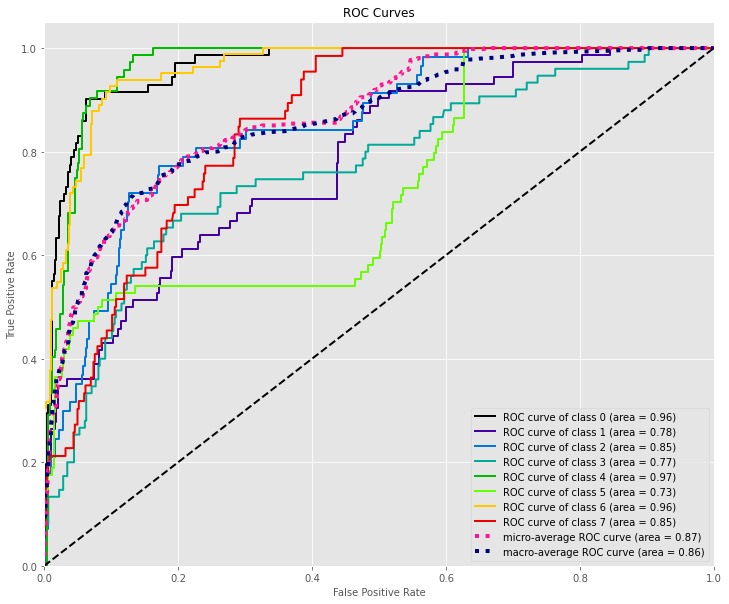

In [164]:
nb=GaussianNB()
nb.fit(x_train,Y_train)

nb_Y_pred=nb.predict(x_test)

accuracy_score(Y_test,nb_Y_pred)

np.mean(cross_val_score(nb,x_over,Y_over,cv=5))

print(classification_report(Y_test,nb_Y_pred))

confusion_matrix(Y_test,nb_Y_pred)


#Navies Bayes
probas=nb.predict_proba(x_test)
skplt.metrics.plot_roc(Y_test,probas)
plt.show()

* The ROC and AUC score is good for both Random Forest by using any model we can build model

## Hyperparameter Tuning

In [165]:
#Randomised Search CV
param_grid={
    'max_depth':[5,10],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion':['gini','entropy']
}

In [166]:
random_search=RandomizedSearchCV(rf, param_grid,cv=5,n_jobs=-1)

In [167]:
random_search.fit(x_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 300]})

In [168]:
random_search.best_params_

{'n_estimators': 300,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini'}

In [169]:
rf=RandomForestClassifier(n_estimators=300,max_features='auto',max_depth=10,criterion='entropy')
rf.fit(x_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        71
           1       0.81      0.58      0.68        72
           2       0.70      0.79      0.74        57
           3       0.85      0.69      0.76        75
           4       0.85      0.97      0.91        72
           5       0.86      0.95      0.90        74
           6       0.89      0.91      0.90        82
           7       0.89      0.77      0.83        66

    accuracy                           0.83       569
   macro avg       0.83      0.83      0.83       569
weighted avg       0.84      0.83      0.83       569



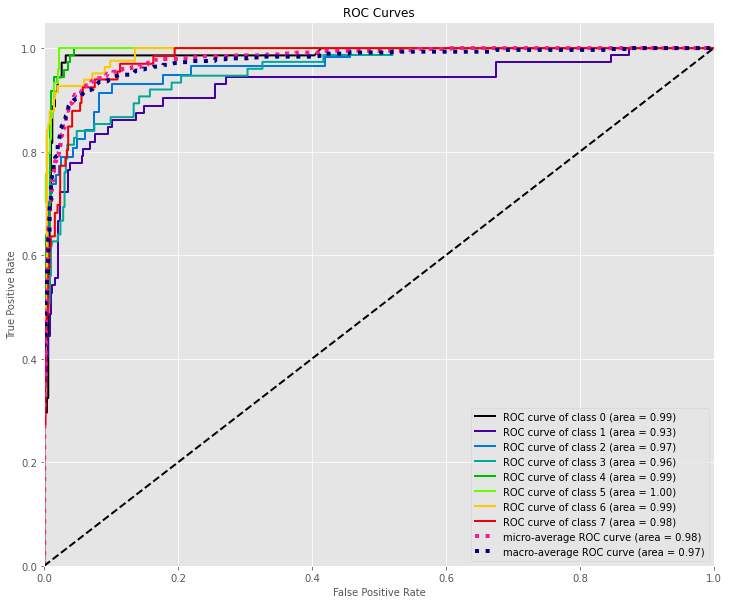

In [170]:
rf_pred=rf.predict(x_test)
rf_pred

#traing score 
rf.score(x_train,Y_train)

#testing 
rf.score(x_test,Y_test)

#accuracy
accuracy_score(Y_test,rf_pred)

#cross validation 
np.mean(cross_val_score(rf,x_over,Y_over,cv=5))

#### Evaluation Metrics

print(classification_report(Y_test,rf_pred))

confusion_matrix(Y_test,rf_pred)

#Random Forest
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(Y_test,probas)
plt.show()

* most of classes near to ROC score
* Random Forest classifier score is good
* After hyper parameter tuning there is no improvement

### Model Saving

In [171]:
import pickle
filename='Global power fuel type Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

* Before hyperparameter the accuracy was 85%.
* We have accuracy score of 83% in predicting the fuel type.